## **Objetivo del Notebook**

Haremos un análisis de los datos airline_passenger_satisfaction, que mide el grado de satisfacción de los clientes de una aerlínea, para alimentar un modelo de machine learning y poder precedir si los futuros clientes estarán satisfechos o no, en base a los servicios contratados.

## **Contenido del Notebook**


1. Comprensión básica de los datos

2. Análisis exploratorio de datos (EDA)

3. Ingeniería de características

4. Preprocesamiento de datos

5. Entrenamiento del modelo

6. Comprobación del rendimiento del modelo

7. Ajuste de hiperparámetros del modelo

8. Análisis de las características con más peso en el modelo

9. Conclusiones

In [305]:
!pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/69/60/87a06ef66b34cbe2f2eb0ab66f003664404a7f40c21403a69fad7e28a82b/optuna-3.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/a2/8b/46919127496036c8e990b2b236454a0d8655fd46e1df2fd35610a9cbc842/alembic-1.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for cmaes>=0.10.0 from https://files.pythonhosted.org/packages/f7/46/7d9544d453346f6c0c405916c95fdb653491ea2e9976cabb810ba2fe8cd4/cmaes-0.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=1.3.0 from https://files.pythonhosted.org/packages/10/81/230bec5713913a472003b71c8dd7e3572de44499e741df576fd6b39d82c8/SQLAlchemy-2.0.20-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py

In [306]:
!pip install eli5

# **Importamos las librerías necesarias**

In [311]:
# Librerías de tratamiento de datos
import numpy as np
import pandas as pd
import math

# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de ML
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import recall_score, precision_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
import preprocessing 
import pickle
import optuna
#import eli5
#from eli5.sklearn import PermutationImportance

In [313]:
url = '../airline_passenger_satisfaction.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# **1. Comprensión básica de los datos**

1.1. Descripción de los datos

1.2. Valores únicos de cada columna

1.3. Comprobación de las dimensiones de los datos

1.4. Visualización del conjunto de datos

1.5. Comprobación de tipos de datos

    🔹 Categóricos

    🔹 Numéricos

    🔹 Tipos de datos mixtos

    🔹 Errores o erratas

1.6. Comprobación de datos duplicados

1.7. Comprobación del número total y el porcentaje de valores omitidos

1.8. Comprobación de la cardinalidad de las características categóricas

### **1.1. Descripción de los datos**

Los datos incluidos en el DF son los siguientes:

* __Unnamed__. Es una **columna** que replica el id de la fila. No es relevante para los análisis.

* __id__. Es un identificativo no relevante.

* __Age (Edad)__: La edad del cliente que proporcionó la satisfacción.

* __Arrival Delay in Minutes (Retraso en la llegada en minutos)__: El tiempo de retraso en minutos en la llegada del vuelo.

* __Baggage handling (Manejo de equipaje)__: La satisfacción del cliente con el servicio de manejo de equipaje.

* __Checkin service (Servicio de check-in)__: La satisfacción del cliente con el servicio de check-in.

* __Class (Clase)__: La clase de servicio contratada por el cliente.

* __Cleanliness (Limpieza)__: La satisfacción del cliente con la limpieza del avión.

* __Customer Type (Tipo de cliente)__: Si el cliente es un viajero frecuente o ocasional.

* __Departure Delay in Minutes (Retraso en la salida en minutos)__: El tiempo de retraso en minutos en la salida del vuelo.

* __Departure/Arrival time convenient (Conveniencia de la hora de salida/llegada)__: La satisfacción del cliente con la conveniencia de los horarios de salida y llegada.

* __Ease of Online booking (Facilidad de reserva en línea)__: La satisfacción del cliente con la facilidad de reservar en línea.
Female (Género): El género del cliente.

* __Flight Distance (Distancia del vuelo)__: La distancia del vuelo en kilómetros.

* __Flight entertainment (Entretenimiento a bordo)__: La satisfacción del cliente con el entretenimiento a bordo.

* __Food and drink (Comida y bebida)__: La satisfacción del cliente con la comida y bebida a bordo.

* __Gate location (Ubicación de la puerta)__: La satisfacción del cliente con la ubicación de la puerta de embarque.

* __Inflight service (Servicio a bordo)__: La satisfacción del cliente con el servicio a bordo.

* __Inflight wifi service (Servicio de wifi a bordo)__: La satisfacción del cliente con el servicio de wifi a bordo.

* __Leg room service (Servicio de espacio para las piernas)__: La satisfacción del cliente con el espacio para las piernas.

* __On-board service (Servicio a bordo)__: La satisfacción del cliente con el servicio a bordo en general.

* __Online boarding (Embarque en línea)__: La satisfacción del cliente con el proceso de embarque en línea.

* __Seat comfort (Comodidad del asiento)__: La satisfacción del cliente con la comodidad de los asientos.

* __Type of Travel (Tipo de viaje)__: Si el viaje es de negocios o de placer.

* __satisfaction (Satisfacción)__: La satisfacción general del cliente con la aerolínea. En este DF solo se valora si el cliente está satisfecho. Cualquier otra respuesta se toma como que no está satisfecho.

In [314]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### **1.2. Valores únicos de cada columna**

In [6]:
# Obtener los valores únicos de las columnas que los pueden tener
cols_con_unicos = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Inflight service',
    'Cleanliness',
    'satisfaction'
]

vals_unicos = {}
for col in cols_con_unicos:
  valores = df[col].unique()
  vals_unicos[col] = valores
vals_unicos

{'Gender': array(['Male', 'Female'], dtype=object),
 'Customer Type': array(['Loyal Customer', 'disloyal Customer'], dtype=object),
 'Type of Travel': array(['Personal Travel', 'Business travel'], dtype=object),
 'Class': array(['Eco Plus', 'Business', 'Eco'], dtype=object),
 'Inflight wifi service': array([3, 2, 4, 1, 5, 0]),
 'Departure/Arrival time convenient': array([4, 2, 5, 3, 1, 0]),
 'Ease of Online booking': array([3, 2, 5, 4, 1, 0]),
 'Gate location': array([1, 3, 2, 5, 4, 0]),
 'Food and drink': array([5, 1, 2, 4, 3, 0]),
 'Online boarding': array([3, 5, 2, 1, 4, 0]),
 'Seat comfort': array([5, 1, 2, 3, 4, 0]),
 'Inflight entertainment': array([5, 1, 2, 3, 4, 0]),
 'On-board service': array([4, 1, 2, 3, 5, 0]),
 'Inflight service': array([5, 4, 3, 1, 2, 0]),
 'Cleanliness': array([5, 1, 2, 3, 4, 0]),
 'satisfaction': array(['neutral or dissatisfied', 'satisfied'], dtype=object)}

### **1.3. Comprobación de las dimensiones de los datos**

In [315]:
df.shape

(103904, 25)

EL total de filas son 103904 y el total de columnas son 25.

### **1.4. Visualización del conjunto de datos**

In [316]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### **1.5. Comprobación de tipos de datos**


In [317]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

##### **Definición de variables categóricas y numéricas**

In [318]:
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index.tolist()
numeric_columns = data_types[data_types != 'object'].index.tolist()

print("1. Columnas Categóricas:", ", ".join(categorical_columns))
print()
print("2. Columnas Numéricas:", ", ".join(numeric_columns))

1. Columnas Categóricas: Gender, Customer Type, Type of Travel, Class, satisfaction

2. Columnas Numéricas: Unnamed: 0, id, Age, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes


Las columnas **Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness**, son consideradas por **dtypes** como **Variables Numéricas**, pero con el analisis preliminar de las mismas, debido a que sus datos representan (tentativamente) el grado de satisfacción del cliente en relación a ese servicio.

Por lo tanto, dichas columnas van a ser tomadas como **Categóricas Ordinales**.

Sería interesante estudiar que representan cada uno de los valores dentro de esas columnas, en especial, la **valoración "0"**, que puede tomarse como un calificación desfavorable, ó que el cliente no quiso responder.

Por otra parte, la variable objetivo **"satisfaction"** es un string, y sería bueno en un futuro, convertirla en variable booleana.



### **1.6. Comprobar los datos duplicados**

In [319]:
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 0


### **1.7. Verificar valores Nulos**

In [320]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Sola hay una columna (Arrival Delay in Minutes), la cual contiene muy pocos valores nulos en relación al total de las filas del df.

### **1.8. Comprobar la Cardinalidad**

In [321]:
print("La cardinalidad de las columnas es:")
print()
print(df.select_dtypes(include="int").nunique())

La cardinalidad de las columnas es:

Unnamed: 0                           103904
id                                   103904
Age                                      75
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
dtype: int64


In [322]:
print("La cardinalidad de las columnas categóricas es:")
print()
print(df.select_dtypes(include="object").nunique())

La cardinalidad de las columnas categóricas es:

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64


## **2. Análisis exploratorio de datos (EDA)**

Visualización de características:

2.1. Variable objetivo 'satisfaction'

2.2. 'Customer Type' respecto a 'satisfaction'

2.3. Analizamos los distintos servicios de la compañía

2.4. Edad

2.5. Edad respecto a clases y servicios

2.6. Retrasos en salidas y llegadas

2.7. Llegadas sin retraso

2.8. 'Flight Distance'

2.9. Relación entre Type of Travel, Class y Flight Distance

2.10. Dispersión y Outliers con boxplots

2.11. Correlación - Mapa de calor




### **2.1. Analizamos la variable objetivo 'satisfaction'**

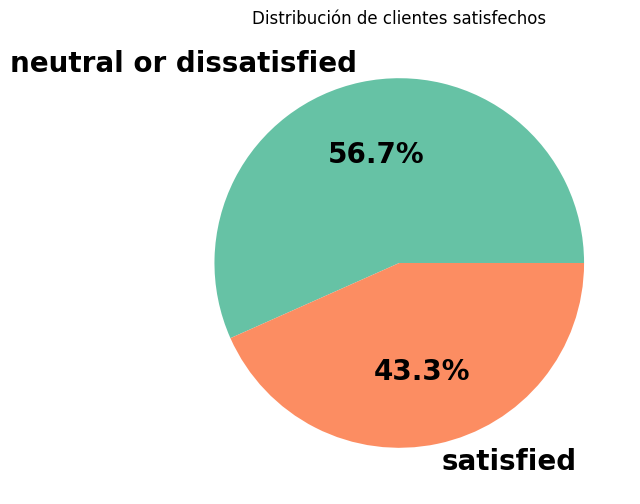

In [15]:
plt.figure(figsize=(10,6))
plt.pie(df["satisfaction"].value_counts(),labels=df["satisfaction"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Distribución de clientes satisfechos")
plt.show()

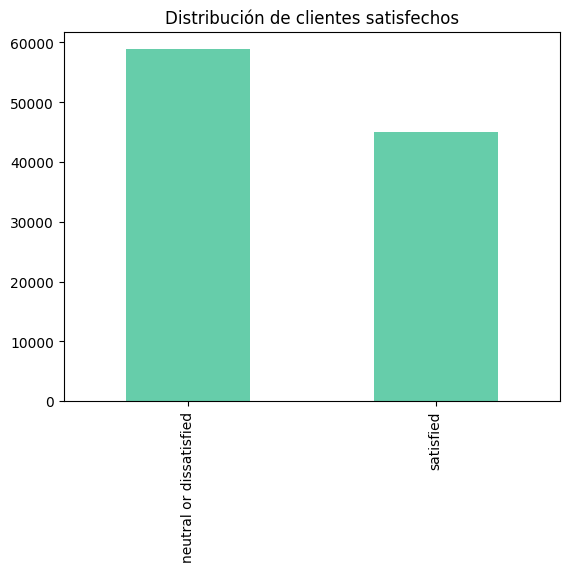

In [16]:
df['satisfaction'].value_counts().plot(kind='bar', color='mediumaquamarine')
plt.title("Distribución de clientes satisfechos")
plt.show()

**Observaciones**

El porcentaje de personas no satisfechas o neutrales (56,7%) es más alto que el de personas satisfechas (43,3%). Probablemente éste sea el motivo de que la empresa quiera ver qué servicios influyen más en la valoración de la gente para así mejorar.

### **2.2. Analizamos la variable 'Customer Type' respecto a 'satisfaction'**

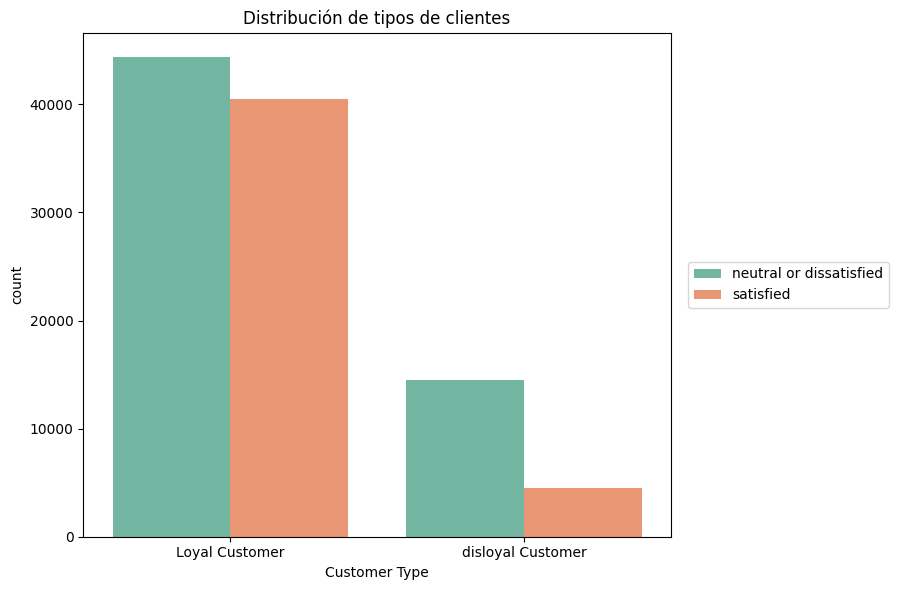

In [17]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Customer Type", hue="satisfaction", data=df, palette="Set2")
plt.title("Distribución de tipos de clientes")
plt.legend(loc='center', bbox_to_anchor=(1.2,0.5))

plt.tight_layout()
plt.show()

**Observaciones**

La mayoría de los clientes son habituales.

Ni los clientes leales ni los ocasionales están satisfechos con el servicio de la compañía, pero el número de insatisfechos en los ocasionales es mucho mayor en proporción.

El que prueba repite aunque no esté satisfecho, quizá porque sea una compañía barata, o porque es la única que hace determinados trayectos.

### **2.3. Analizamos los distintos servicios de la compañía**

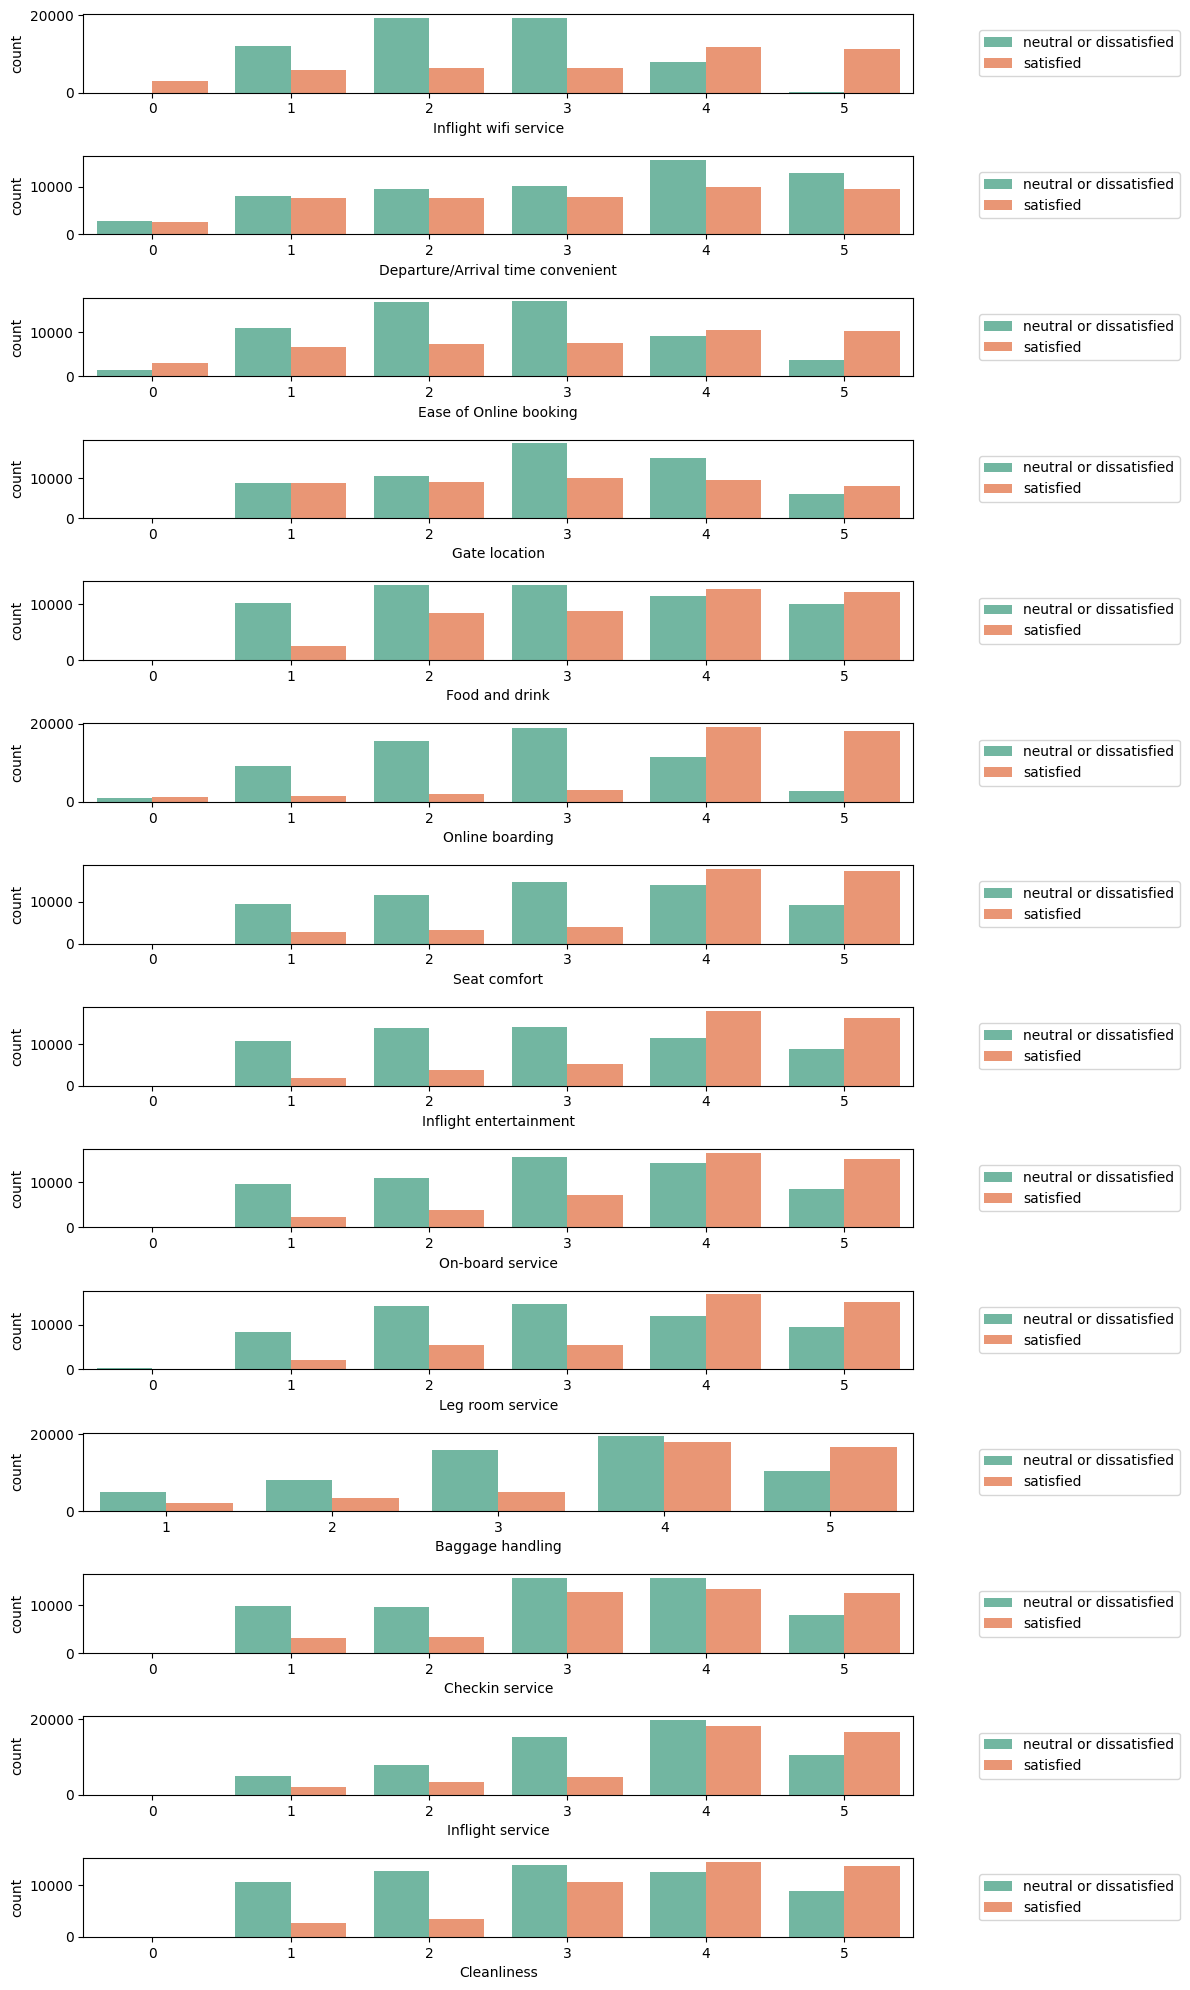

In [18]:
group_cols = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

plt.figure(figsize=(12,20))
for idx,column in enumerate(group_cols):
    plt.subplot(14,1,idx+1)
    sns.countplot(x=column, hue="satisfaction", data=df, palette="Set2")
    plt.legend(loc='center', bbox_to_anchor=(1.2,0.5))
    plt.tight_layout()

**Observaciones**

- No sabemos si el valor '0' se refiere a una valoración negativa, o a que no respondieron. El hecho de que haya servicios en los que no existe ese valor como en 'Bagagge handling' y que en muchos el número de satisfechos sea más alto que el de insatisfechos, nos hace sospechar que probablemente el '0' signifque que no respondieron. Quizá debamos eliminar esa columna cuando procesemos los datos.

- Para las valoraciones de 1, 2 y 3, está muy claro que los que dieron esas puntuaciones 'bajas', finalmente se declararon 'insatisfechos'.

- En las valoraciones de 4 y 5, consideradas 'altas'. podemos ver que no está tan claro, mucha gente que dió puntuaciones altas, finalmente se declaró insatisfecha. Esto puede deberse a que hubo algún otro servicio que claramente le afectó negativamente.



### **2.4. Analizamos la edad**

Text(0.5, 1.0, "Distribución de 'Age'")

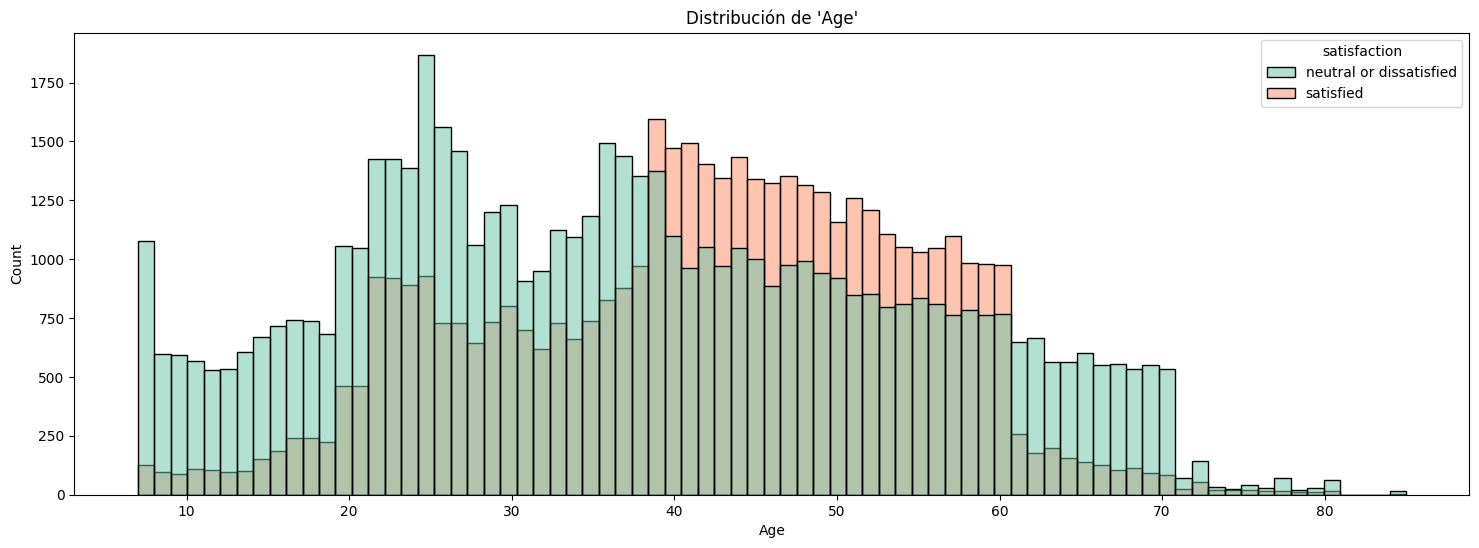

In [19]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Age",  hue='satisfaction', palette="Set2")
plt.title("Distribución de 'Age'")

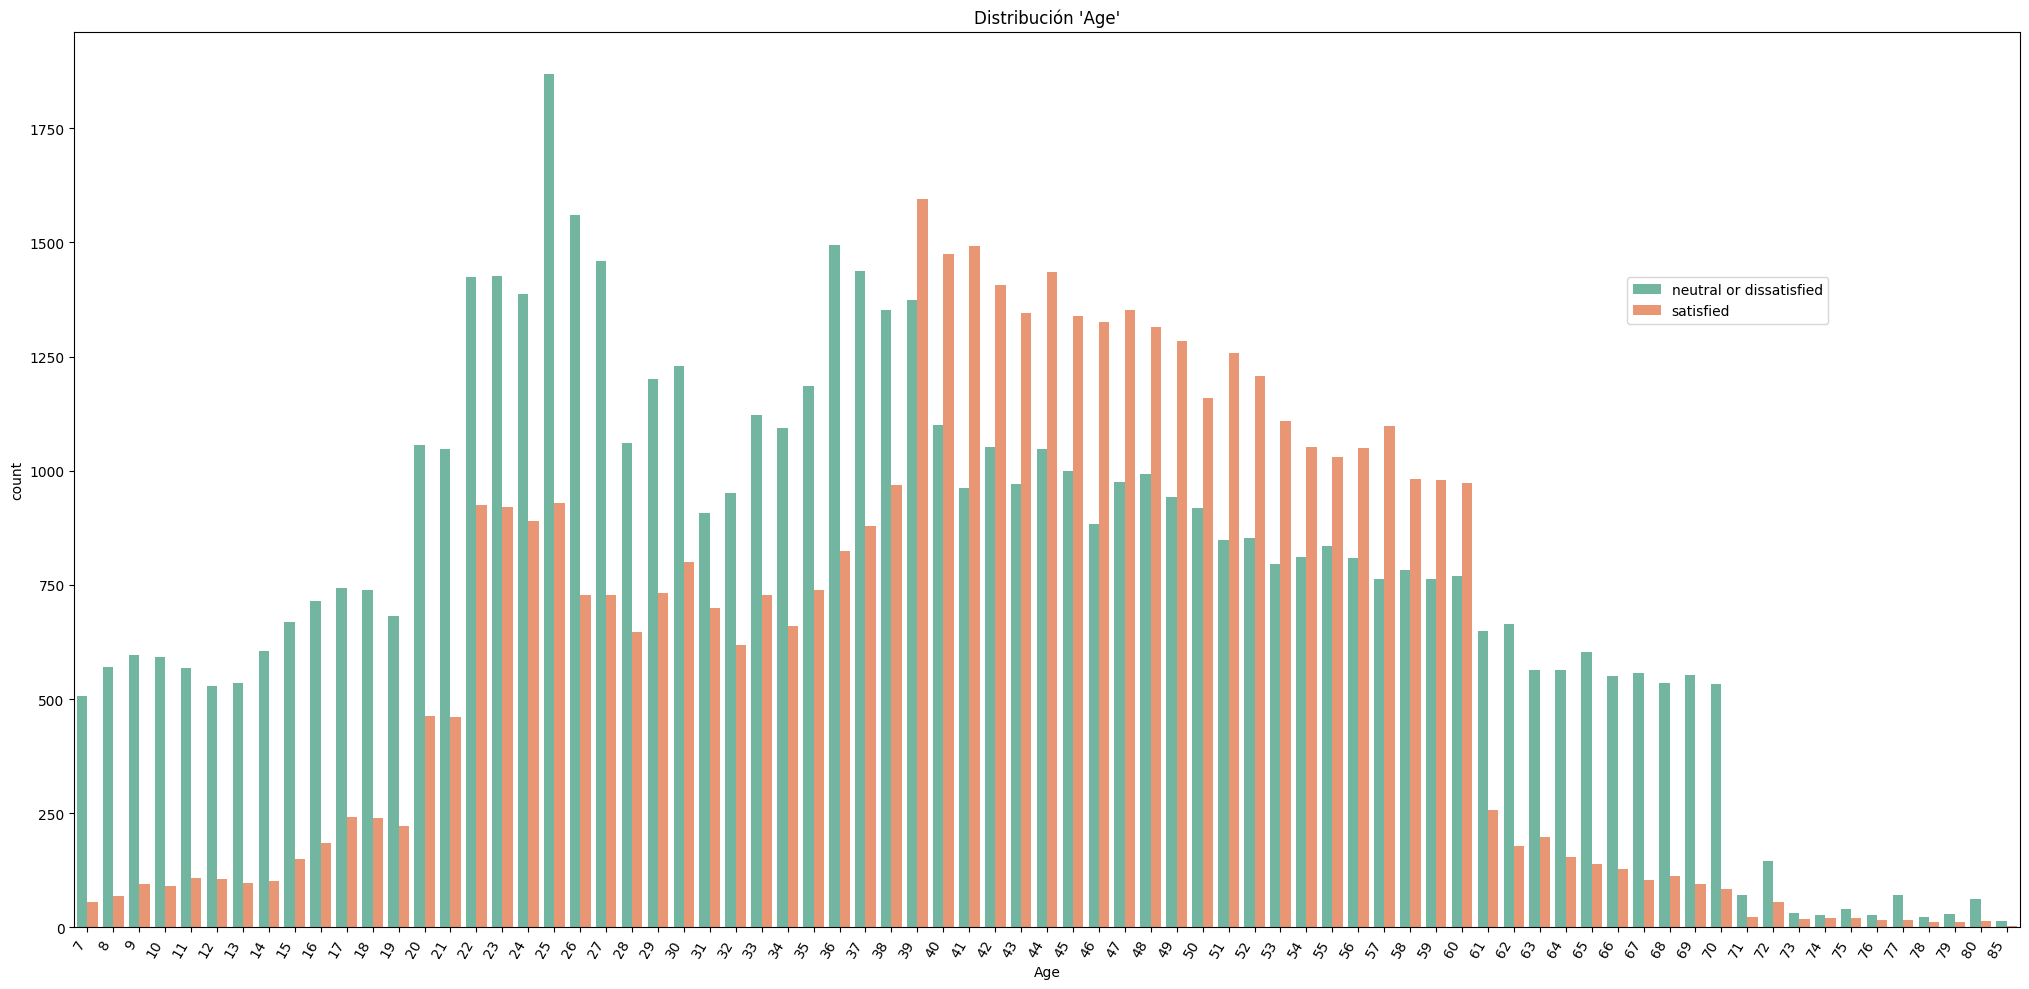

In [20]:
plt.figure(figsize=(40,10))

plt.subplot(1,2,1)
sns.countplot(x="Age", hue="satisfaction", data=df, palette="Set2")
plt.title("Distribución 'Age'")
plt.legend(loc='center', bbox_to_anchor=(0.85,0.7))
plt.xticks(rotation=60, ha='right')

plt.tight_layout()
plt.show()

**Observaciones**

- De 7 a 38 años, el número de neutrales o insatisfechos es muy alto.

- De 39 a 60 años, el número de 'satisfechos' es superior al de 'insatisfechos'.

- De 61 a 85 años, el número de insatisfechos vuelve a ser superior.

Esto puede deberse al tipo de servicios contratados, sería interesante agrupar por rangos de edades y analizar los distintos servicios.

###**2.5. Analizamos la edad respecto a clases y servicios**

Para poder analizar la distribución de servicios para cada edad, agruparemos las edades en 3 rangos:

- De 7 a 38 años

- De 39 a 60 años

- A partir de 61 años

In [21]:
df_age = df.copy()

In [22]:
def age_group(age):
    if age <= 38:
        return '7-38'
    elif 38 < age <= 60:
        return '39-60'
    else:
        return '+60'

df_age['Age Group'] = df_age['Age'].apply(age_group)

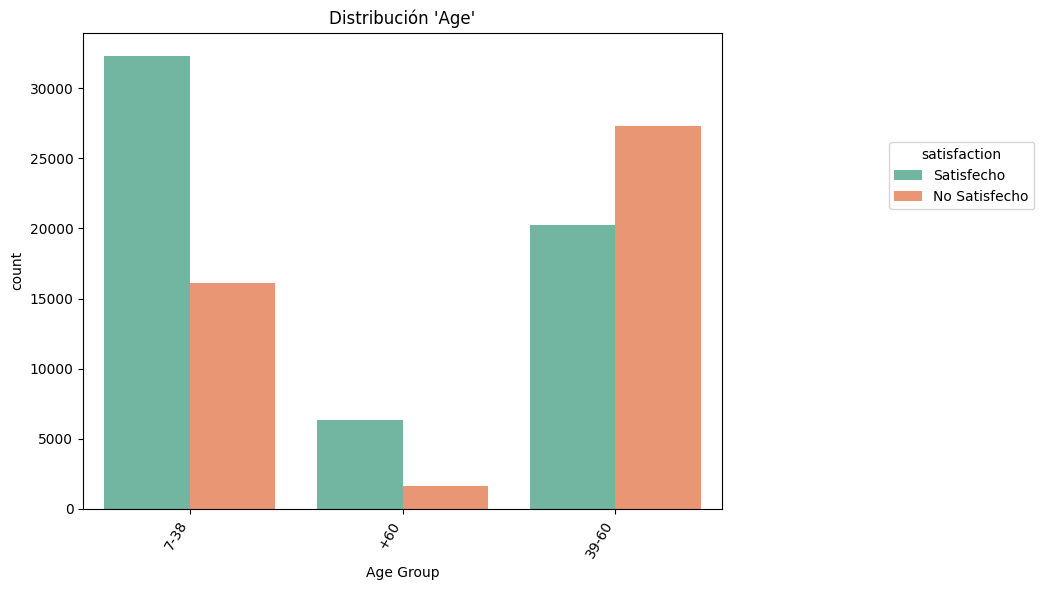

In [23]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear la gráfica de barras
sns.countplot(x="Age Group", hue="satisfaction", data=df_age, palette="Set2")
plt.title("Distribución 'Age'")
plt.legend(title='satisfaction', labels=['Satisfecho', 'No Satisfecho'], loc='center right', bbox_to_anchor=(1.5,0.7))
plt.xticks(rotation=60, ha='right')


# Mostrar la gráfica
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribución de clases por edad')

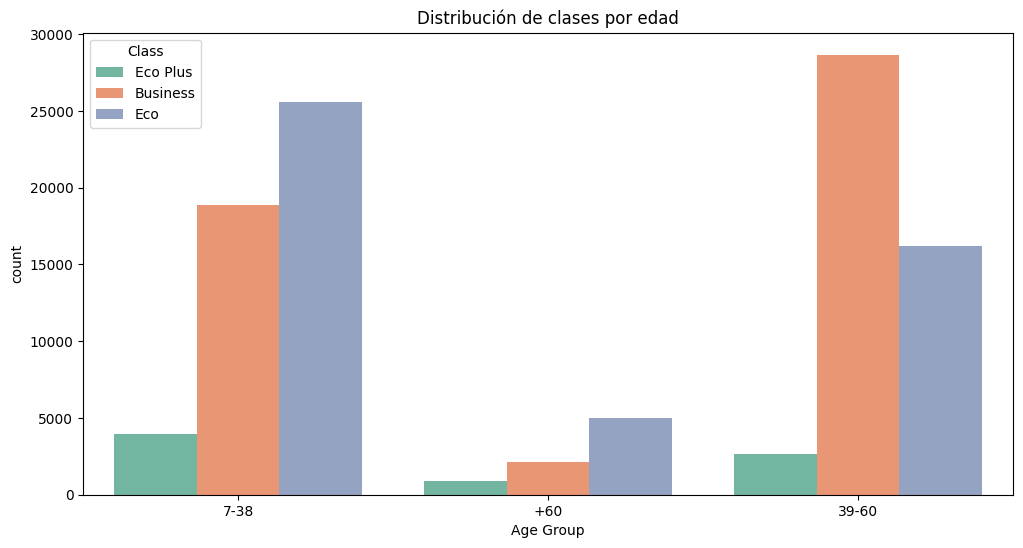

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_age, x="Age Group",  hue='Class', palette="Set2")
plt.title("Distribución de clases por edad")

**Observaciones**

Los que más viajan en bussines son los del rango entre 39 y 60 años, que es además el rango de edad más satisfecho.

**Servicios en función de la edad**

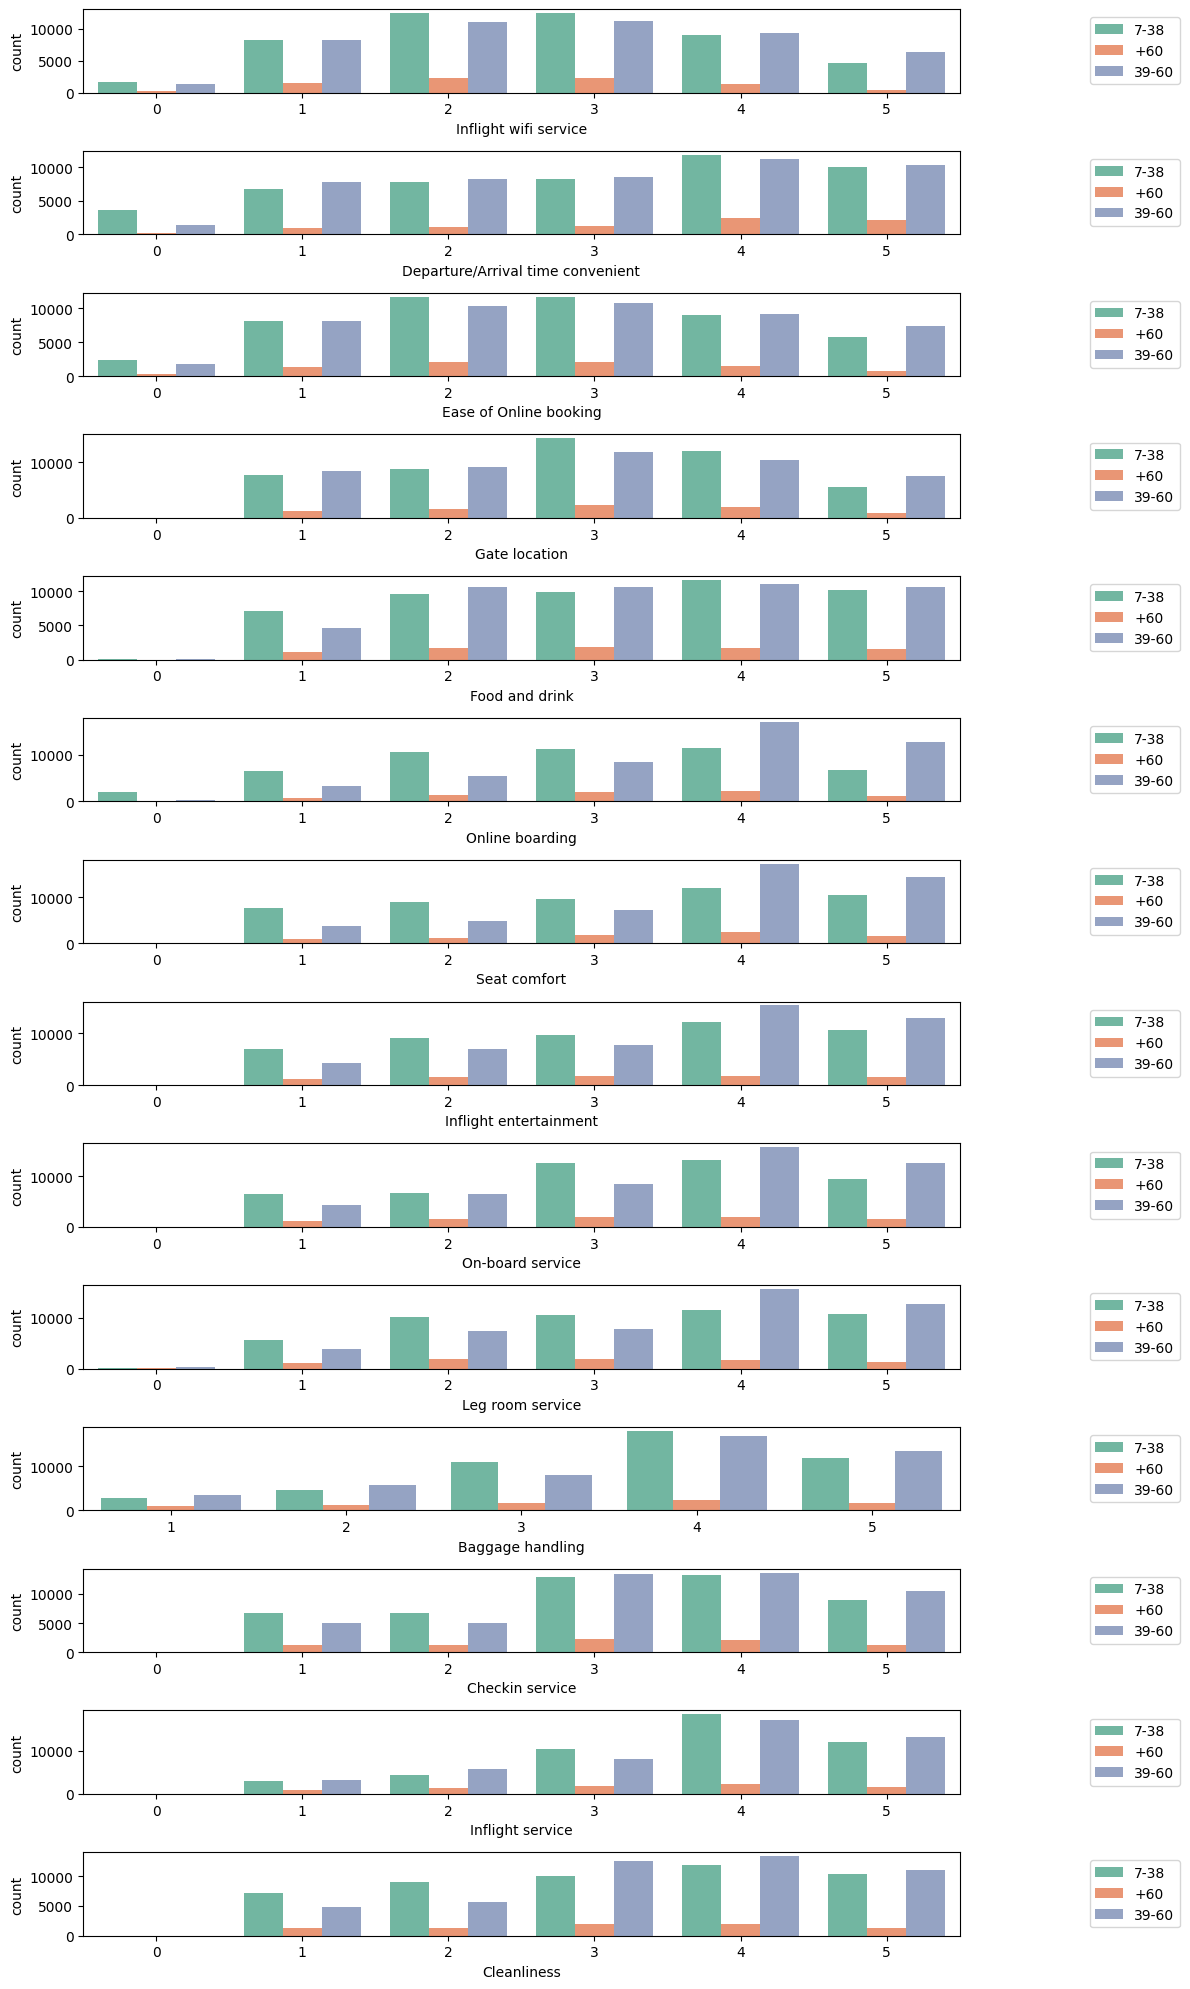

In [25]:
group_cols = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

plt.figure(figsize=(12,20))
for idx,column in enumerate(group_cols):
    plt.subplot(14,1,idx+1)
    sns.countplot(x=column, hue="Age Group", data=df_age, palette="Set2")
    plt.legend(loc='center', bbox_to_anchor=(1.2,0.5))
    plt.tight_layout()

- Los servicios que peor puntúa el grupo intermedio son: Inflight wifi service y Ease of Online booking.

- El primer grupo(el más descontento) suele puntuar positivamente: Cleanliness, Inflight service, Baggage handling, Checkin service y Departure/Arrival time convenient.

- De forma general, los servicios con peores puntuaciones son: Ease of Online booking, Departure/Arrival time convenient, Inflight wifi service, Gate location y Food and drink.

### **2.6. Analizamos los retrasos en salidas y llegadas**

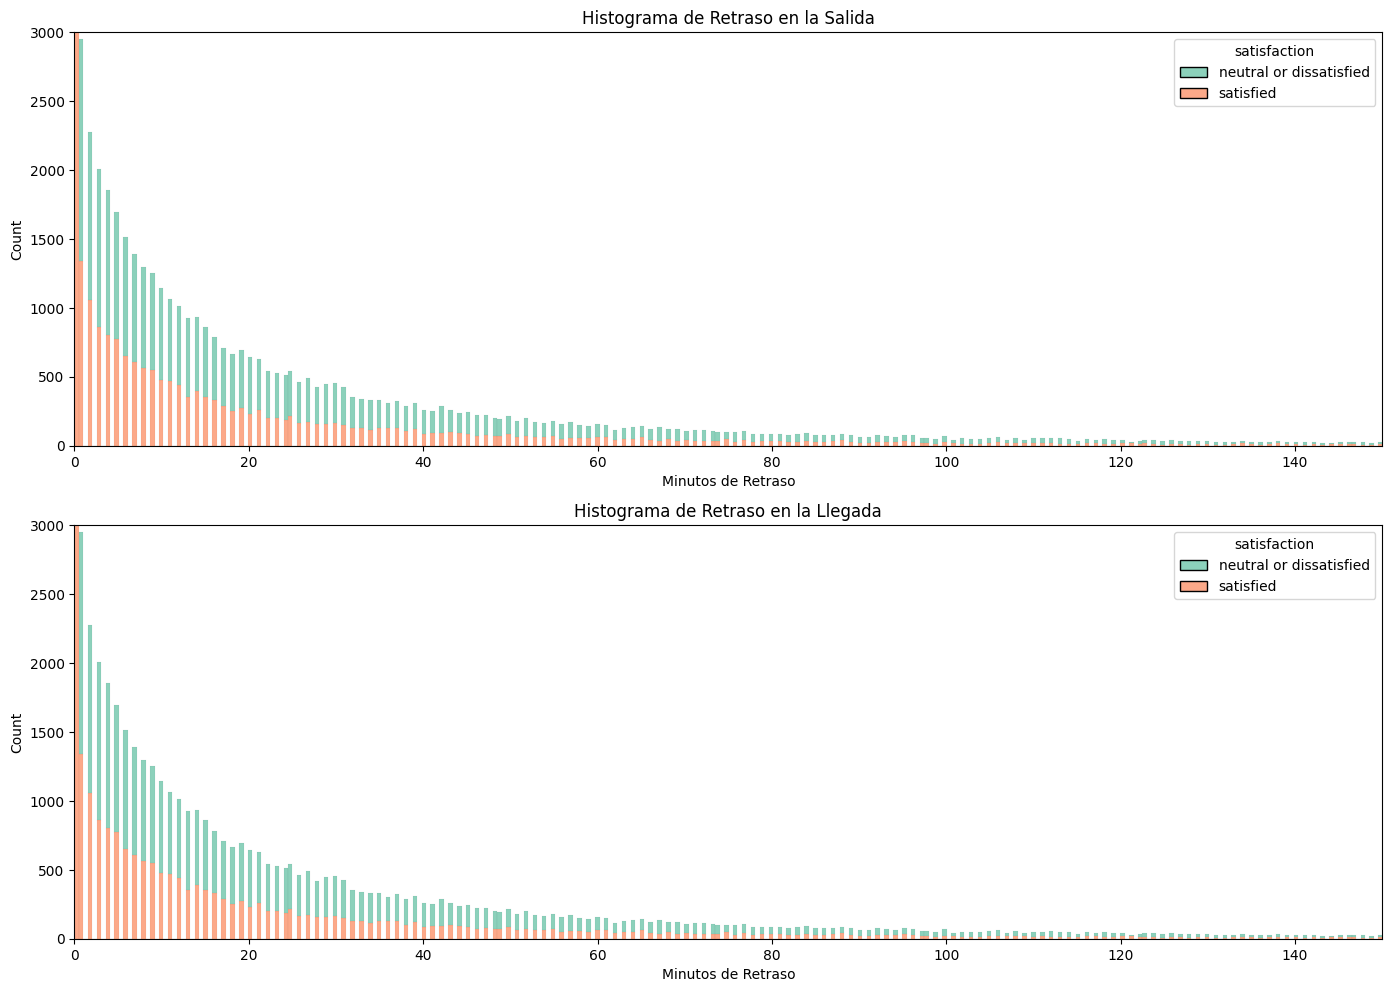

In [26]:
# Gráfica de las columnas de retraso en salidas y llegadas

plt.figure(2, figsize=(14, 10))  # Aumenté el tamaño de la figura para que sea más grande y legible
plt.subplot(211)
sns.histplot(data=df, x='Departure Delay in Minutes',  hue='satisfaction', palette="Set2", multiple='stack')
plt.title('Histograma de Retraso en la Salida')
plt.xlabel('Minutos de Retraso')
plt.xlim(0, 150)  # Establecemos el límite del eje x en 0 a 200
plt.ylim(0, 3000)


plt.subplot(212)
sns.histplot(data=df, x='Departure Delay in Minutes',  hue='satisfaction', palette="Set2", multiple='stack')
plt.title('Histograma de Retraso en la Llegada')
plt.xlabel('Minutos de Retraso')
plt.xlim(0, 150)  # Establecemos el límite del eje x en 0 a 200
plt.ylim(0, 3000)


plt.tight_layout(pad=1)
plt.show()  # Mostrar la gráfica

**Observaciones**

Podemos observar que la mayoría de los retrasos son de pocos minutos, y que el número de insatisfechos, independientemente de los minutos de retraso, suele ser el doble o más que el de satisfechos.


Vamos a hacer otra gráfica donde observar mejor la columna de retraso '0 minutos', para ver si,  a pesar de no haber retraso, el número de insatisfechos es igualmente el doble.

### **2.7. Analizamos las llegadas sin retraso**

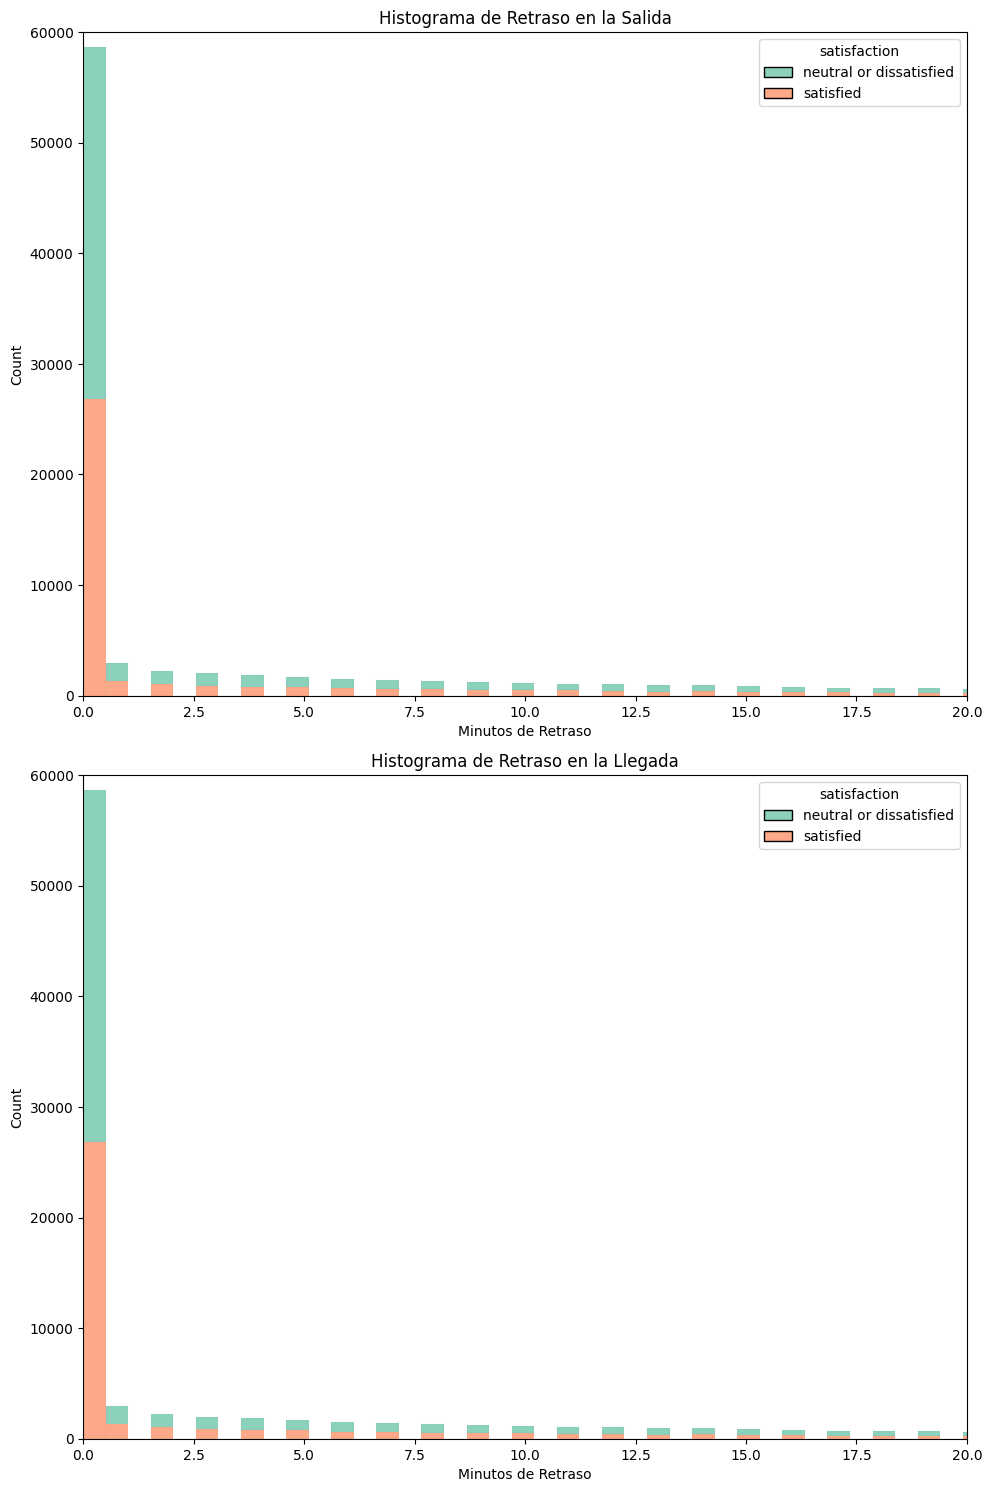

In [27]:
# Gráfica de las columnas de retraso en salidas y llegadas

plt.figure(2, figsize=(10, 15))  # Aumenté el tamaño de la figura para que sea más grande y legible
plt.subplot(211)
sns.histplot(data=df, x='Departure Delay in Minutes',  hue='satisfaction', palette="Set2", multiple='stack')
plt.title('Histograma de Retraso en la Salida')
plt.xlabel('Minutos de Retraso')
plt.xlim(0, 20)  # Establecemos el límite del eje x en 0 a 200
plt.ylim(0, 60000)


plt.subplot(212)
sns.histplot(data=df, x='Departure Delay in Minutes',  hue='satisfaction', palette="Set2", multiple='stack')
plt.title('Histograma de Retraso en la Llegada')
plt.xlabel('Minutos de Retraso')
plt.xlim(0, 20)  # Establecemos el límite del eje x en 0 a 200
plt.ylim(0, 60000)


plt.tight_layout(pad=1)
plt.show()  # Mostrar la gráfica

**Observaciones**

La columna de llegada retraso '0' es muchísimo más grande que cualquiea de las siguientes, por lo que parece que los retrasos no son un problema habitual de la aerolínea.

Al ampliar las gráficas y observar mejor los datos de insatisfechos cuando no hay retraso, vemos que igualmente es el doble que el de satisfechos, por lo que deben ser otras características las que más están afectando a la decisión final.



### **2.8. Analizamos 'Flight Distance'**

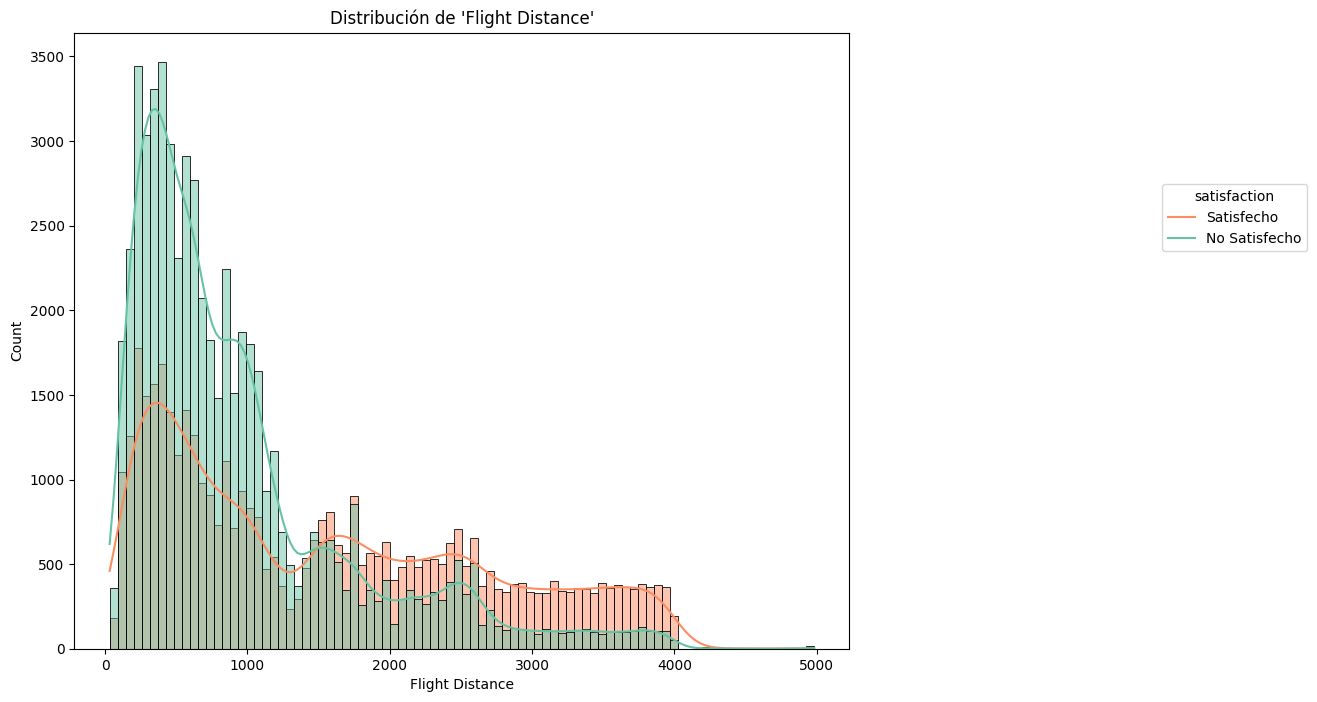

In [28]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x="Flight Distance",  hue='satisfaction', kde=True, palette="Set2")
plt.title("Distribución de 'Flight Distance'", )
plt.legend(title='satisfaction', labels=['Satisfecho', 'No Satisfecho'], loc='right', bbox_to_anchor=(1.6,0.7))
plt.show()

**Observaciones**

Podemos ver que a medida que aumenta la distancia de vuelo, la proporción de pasajeros satisfechos es mayor.
Esto podría deberse al tipo de servicios con los que cuentan durante el vuelo, o quizá al tipo de viajeros.
Sería interesante compararlo con otras variables.

### **2.9. Analizamos la relación entre Type of Travel, Class y Flight Distance**

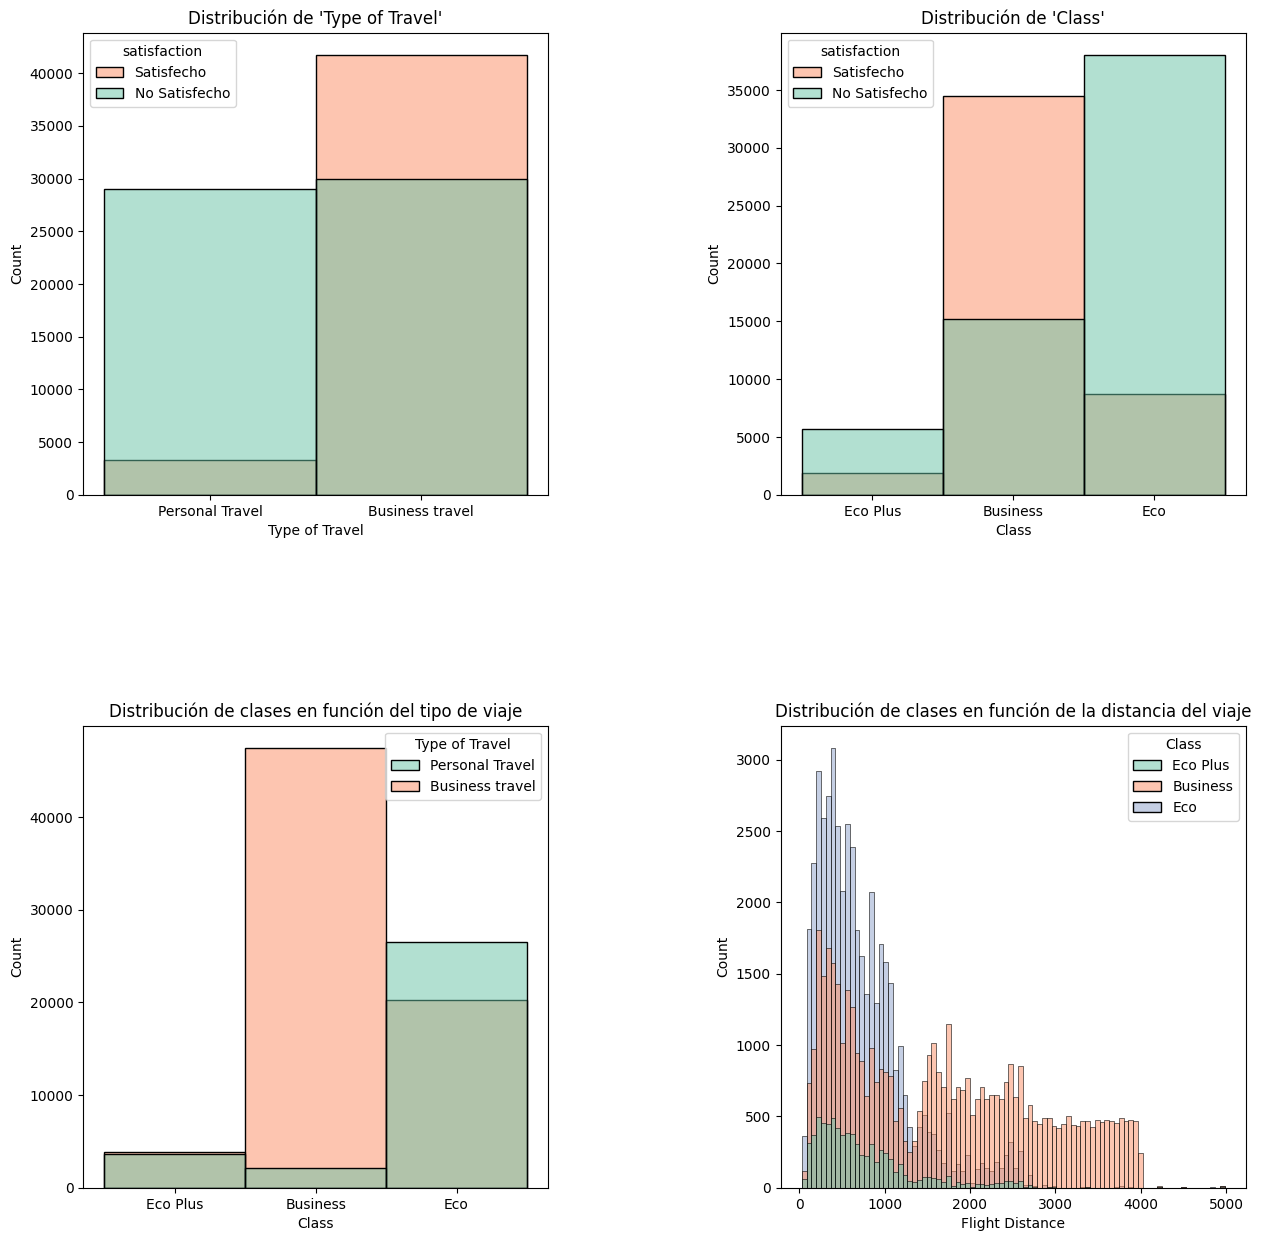

In [29]:
plt.figure(2, figsize=(15, 15))

plt.subplot(221)
sns.histplot(data=df, x="Type of Travel",  hue='satisfaction', palette="Set2")
plt.title("Distribución de 'Type of Travel'", )
plt.legend(title='satisfaction', labels=['Satisfecho', 'No Satisfecho'])

plt.subplot(222)
sns.histplot(data=df, x="Class",  hue='satisfaction', palette="Set2")
plt.title("Distribución de 'Class'")
plt.legend(title='satisfaction', labels=['Satisfecho', 'No Satisfecho'])


plt.subplot(223)
sns.histplot(data=df, x="Class",  hue='Type of Travel', palette="Set2")
plt.title('Distribución de clases en función del tipo de viaje')
#plt.legend(title='satisfaction', labels=['Satisfecho', 'No Satisfecho'])


plt.subplot(224)
sns.histplot(data=df, x="Flight Distance",  hue='Class', palette="Set2")
plt.title('Distribución de clases en función de la distancia del viaje')
#plt.legend(title='satisfaction', labels=['Satisfecho', 'No Satisfecho'])

plt.subplots_adjust(wspace=0.5, hspace=0.5)


plt.show()

**Observaciones**

- La mayoría de los pasajeros viajan por negocios.
- La proporción de viajeros satisfechos es mayor en aquellos que viajan por negocios.
- La mayoría de los pasajeros que viajan por negocios, lo hacen en bussiness.
- La mayoría de los pasajeros que viajan en bussienes hacen trayectos largos.

De todo esto podemos deducir que los viajeros más satisfechos son los que viajan largas distancias por motivos de trabajo, y lo hacen en bussines. Probablemente bussines sea más cómodo y tenga mejores servicios, de ahí que la mayoría de viajeros stisfechos pertenezca a este grupo.


### **2.10. Observamos la dispersión y Outliers con boxplots**

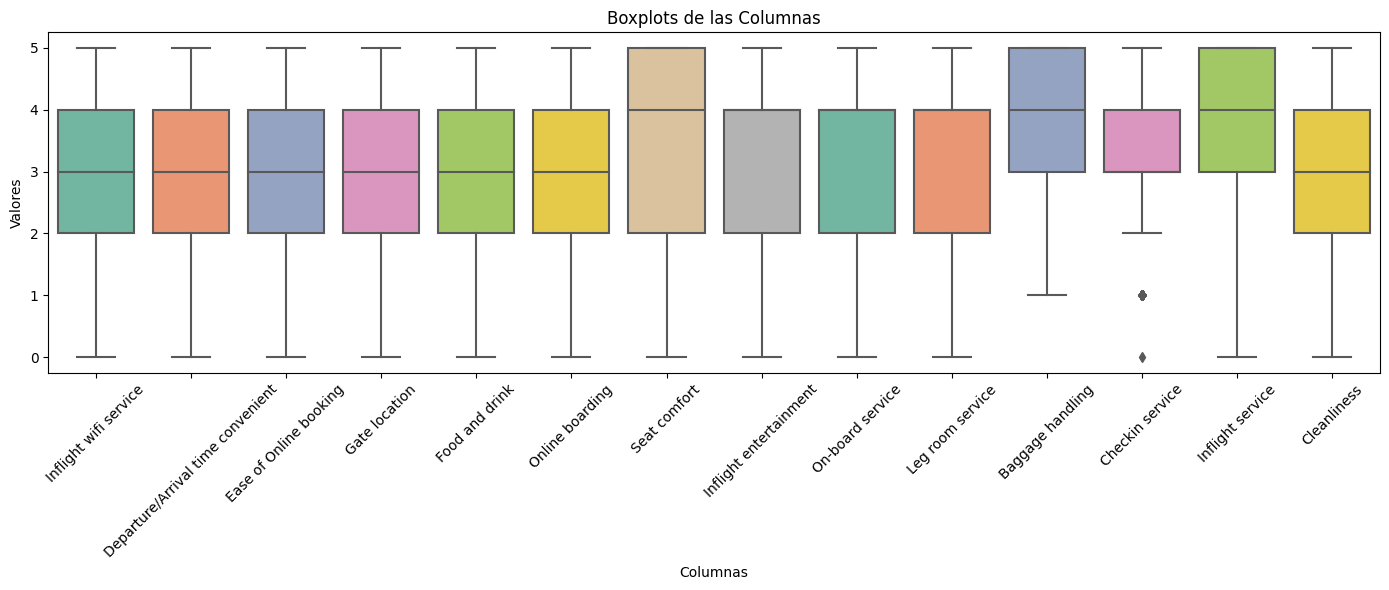

In [33]:
columns_boxplot= df[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 6))

# Crear boxplots para las 4 columnas
sns.boxplot(data=columns_boxplot, orient="v", palette="Set2")

# Configurar etiquetas de los ejes y título
plt.xticks(rotation=45)
plt.xlabel("Columnas")
plt.ylabel("Valores")
plt.title("Boxplots de las Columnas")

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Hay algunas cosas raras en Seat comfort, Baggage handling, Checkin service e Inflight service.

### **2.11. Correlación - Mapa de calor**

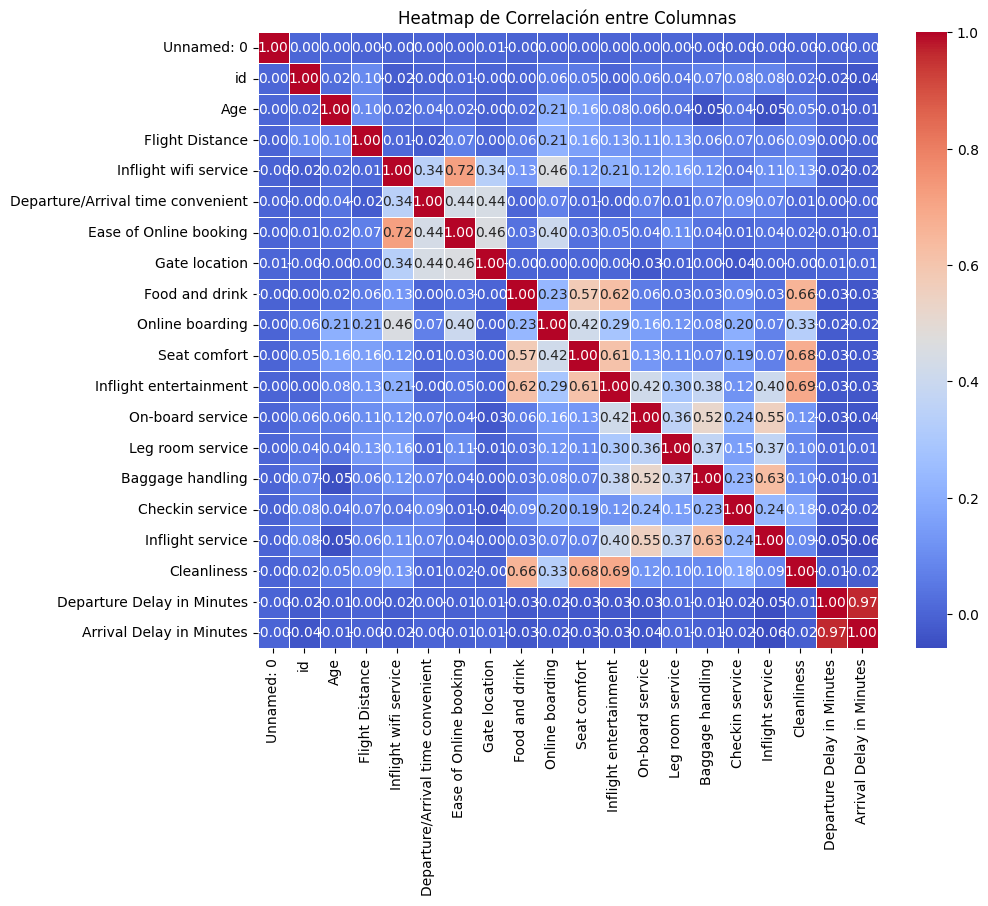

In [34]:
# Mapa de calor

correlacion_numericas = df[numeric_columns].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura, puede ponerse o no.
sns.heatmap(correlacion_numericas, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación entre Columnas')
plt.show()

**Observaciones**

Podemos observar algunas relaciones interesantes como:

- 'Departure Delay in Minutes' y 'Arrival Delay in Minutes': 0.97
- 'Cleanliness' y 'Seat comfort': 0.68
- 'Cleanliness' y 'Inflight entertainment': 0,69
- 'Cleanliness' y 'Food and drink': 0,66
- 'Inflight service' y 'Baggage handling': 0,63



## **3. Ingeniería de características**

Sacamos una copia del DF original, por lo que pueda pasar

In [323]:
df_copia = df

Convertimos la columna satisfaction en booleana con 0 o 1

In [324]:
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


## **4. Preprocesamiento de datos**

4.1. Eliminación de columnas que no vamos a utilizar

4.2. Imputación de valores nulos

4.3. Codificación de características

4.4. Selección de las características y la variable objetivo

4.5. División en train y test

4.6. Escalado de características




### **4.1. Eliminación de columnas que no vamos a utilizar**

**Eliminamos las columnas Unnamed: 0, e id**

In [325]:
df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### **4.2. Imputación de valores nulos**

Vamos a imputar los valores nulos sustituyéndolos por la media.

In [326]:
# Crear un objeto de la clase SimpleImputer()
imputer = SimpleImputer(strategy='mean')

# Aplicar la función SimpleImputer() al dataframe
df['Arrival Delay in Minutes'] = imputer.fit_transform(df[['Arrival Delay in Minutes']])

In [327]:
correlacion = df[group_cols].corr()
correlacion

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Inflight wifi service,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698
Departure/Arrival time convenient,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292
Ease of Online booking,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179
Gate location,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830
Food and drink,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760
Online boarding,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517
Seat comfort,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534
Inflight entertainment,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815
On-board service,0.121500,0.068882,0.038833,-0.028373,0.059073,0.155443,0.131971,0.420153,1.000000,0.355495,0.519134,0.243914,0.550782,0.123220
Leg room service,0.160473,0.012441,0.107601,-0.005873,0.032498,0.123950,0.105559,0.299692,0.355495,1.000000,0.369544,0.153137,0.368656,0.096370


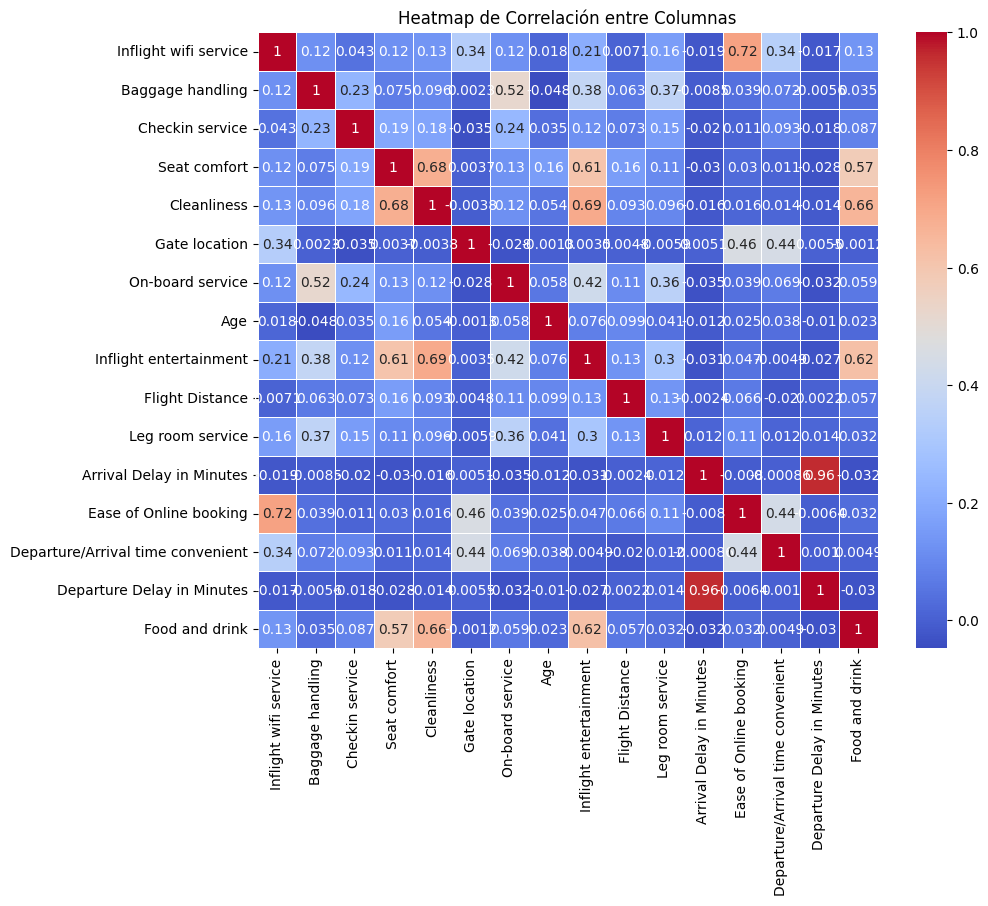

In [40]:
# Crear el heatmap
plt.figure(figsize=(10, 8))  # Opcional: ajusta el tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación entre Columnas')
plt.show()

### **4.3. Codificación de características**

#### *Definición de las columnas numéricas y categóricas*

In [328]:
numeric_features = ['Age', 'Flight Distance', 'Inflight wifi service',
    'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes']
    
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

#### *Construción de transformadores para datos numéricos y categóricos*

In [329]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, drop='first'))
])

#### *Combinación de transformadores:*

In [330]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#### *Creación del pipeline que incluya el preprocesamiento:*

In [334]:
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('rf_model', RandomForestClassifier(random_state=42)),
])

# Guardar el pipeline de Random Forest
with open('rf_pipeline.pkl', 'wb') as f:
    pickle.dump(rf_pipeline, f)

In [335]:
gb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('gb_model', XGBClassifier(random_state=42)),
])

# Guardar el pipeline de XGBoost
with open('gb_pipeline.pkl', 'wb') as f:
    pickle.dump(gb_pipeline, f)

In [336]:
lgbm_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('lgbm_model', LGBMClassifier(random_state=42)),
])

# Guardar el pipeline de LightGBM
with open('lgbm_pipeline.pkl', 'wb') as f:
    pickle.dump(lgbm_pipeline, f)

### **4.4. Selección de las características y la variable objetivo**

In [337]:
# Dividir en conjuntos de entrenamiento y prueba
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

### **4.5. División en train y test**

In [338]:
# Divide los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5. Entrenamiento del modelo**

Empezamos entrenando varios modelos sin validación cruzada para ver cuál nos da menos overfitting.

5.1. Random Forest

5.2. Gradient Boosting

5.3. LightGBM

#### **5.1. Random Forest**

In [339]:
# Entrenar el modelo
rf_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluar el modelo
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

c:\Users\FACTORIA F5\.conda\envs\airenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest:
Accuracy: 0.9619845050767528
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Confusion Matrix:
 [[11482   231]
 [  559  8509]]


In [340]:
# Predecir en los datos de entrenamiento y prueba
y_train_pred = rf_pipeline.predict(X_train)
y_test_pred = rf_pipeline.predict(X_test)

# Calcular la precisión en los datos de entrenamiento y prueba
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Calcular el porcentaje de overfitting
overfitting_percentage = (training_accuracy - testing_accuracy) / training_accuracy * 100

print(f'Precisión en datos de entrenamiento: {training_accuracy}')
print(f'Precisión en datos de prueba: {testing_accuracy}')
print(f'Porcentaje de overfitting: {overfitting_percentage:.2f}%')

Precisión en datos de entrenamiento: 0.9999879696353596
Precisión en datos de prueba: 0.9619845050767528
Porcentaje de overfitting: 3.80%


#### **5.2. Gradient Boosting**

In [341]:
# Entrenar el modelo
gb_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluar el modelo
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

c:\Users\FACTORIA F5\.conda\envs\airenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Gradient Boosting:
Accuracy: 0.9617920215581541
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Confusion Matrix:
 [[11444   269]
 [  525  8543]]


In [342]:
# Predecir en los datos de entrenamiento y prueba
y_train_pred = gb_pipeline.predict(X_train)
y_test_pred = gb_pipeline.predict(X_test)

# Calcular la precisión en los datos de entrenamiento y prueba
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Calcular el porcentaje de overfitting
overfitting_percentage = (training_accuracy - testing_accuracy) / training_accuracy * 100

print(f'Precisión en datos de entrenamiento: {training_accuracy}')
print(f'Precisión en datos de prueba: {testing_accuracy}')
print(f'Porcentaje de overfitting: {overfitting_percentage:.2f}%')

Precisión en datos de entrenamiento: 0.9765768800452341
Precisión en datos de prueba: 0.9617920215581541
Porcentaje de overfitting: 1.51%


### **5.3. LightGBM**

In [343]:
# Entrenar el modelo
lgbm_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred_lgbm = lgbm_pipeline.predict(X_test)

# Evaluar el modelo
print("LightGBM:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

c:\Users\FACTORIA F5\.conda\envs\airenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
LightGBM:
Accuracy: 0.9627544391511477
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Confusion Matrix:
 [[11489   224]
 [  550  8518]]


In [344]:
# Predecir en los datos de entrenamiento y prueba
y_train_pred = lgbm_pipeline.predict(X_train)
y_test_pred = lgbm_pipeline.predict(X_test)

# Calcular la precisión en los datos de entrenamiento y prueba
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Calcular el porcentaje de overfitting
overfitting_percentage = (training_accuracy - testing_accuracy) / training_accuracy * 100

print(f'Precisión en datos de entrenamiento: {training_accuracy}')
print(f'Precisión en datos de prueba: {testing_accuracy}')
print(f'Porcentaje de overfitting: {overfitting_percentage:.2f}%')

Precisión en datos de entrenamiento: 0.966254827183812
Precisión en datos de prueba: 0.9627544391511477
Porcentaje de overfitting: 0.36%


## **6. Comprobación del rendimiento del modelo con validación cruzada**

Aplicamos validación cruzada a los tres modelos elegidos, y sacamos varias medidas estadísticas para ver cuál funciona mejor.

6.1. Random Forest

6.2. Gradient Boosting

6.3. LightGBM

### **6.1. Random Forest**

**Accuracy, Precision, Recall y F1 Score**

In [400]:
# Crear la variable x_train
x_train = preprocessor.fit_transform(X_train)

# Realiza la validación cruzada y obtén las predicciones
y_pred_cv_train = cross_val_predict(rf_pipeline['rf_model'], x_train, y_train, cv=5)

# Calcula las métricas
accuracy = accuracy_score(y_train, y_pred_cv_train)
precision = precision_score(y_train, y_pred_cv_train)
recall = recall_score(y_train, y_pred_cv_train)
f1 = f1_score(y_train, y_pred_cv_train)

print("Métricas con validación cruzada (Train):")
print()
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

c:\Users\FACTORIA F5\.conda\envs\airenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Métricas con validación cruzada (Train):

Accuracy: 0.96
Precision: 0.97
Recall: 0.94
F1 Score: 0.95


In [399]:
# Crear la variable x_test
x_test = preprocessor.fit_transform(X_test)

# Realiza la validación cruzada y obtén las predicciones
y_pred_cv_test = cross_val_predict(rf_pipeline['rf_model'], x_test, y_test, cv=5)

# Calcula las métricas
accuracy = accuracy_score(y_test, y_pred_cv_test)
precision = precision_score(y_test, y_pred_cv_test)
recall = recall_score(y_test, y_pred_cv_test)
f1 = f1_score(y_test, y_pred_cv_test)

print("Métricas con validación cruzada (Test):")
print()
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

c:\Users\FACTORIA F5\.conda\envs\airenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Métricas con validación cruzada (Test):

Accuracy: 0.95
Precision: 0.96
Recall: 0.93
F1 Score: 0.94


**Curva ROC**

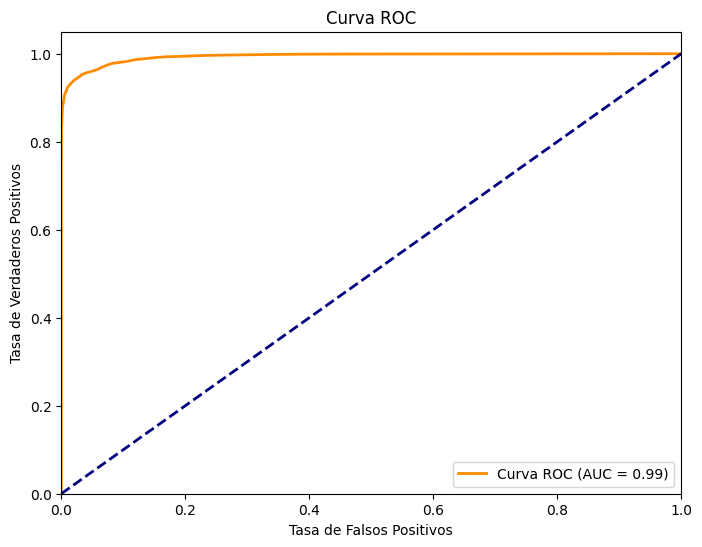

In [403]:
# Obtiene las probabilidades de predicción
y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Un AUC de 0.99 está muy cerca de 1, lo que sugiere que el modelo es altamente efectivo para discriminar entre las clases.

En términos prácticos, un AUC de 0.99 significa que, en la mayoría de los casos, el modelo clasificará correctamente las observaciones positivas y negativas en tus datos de prueba.


**Matriz de confusión**

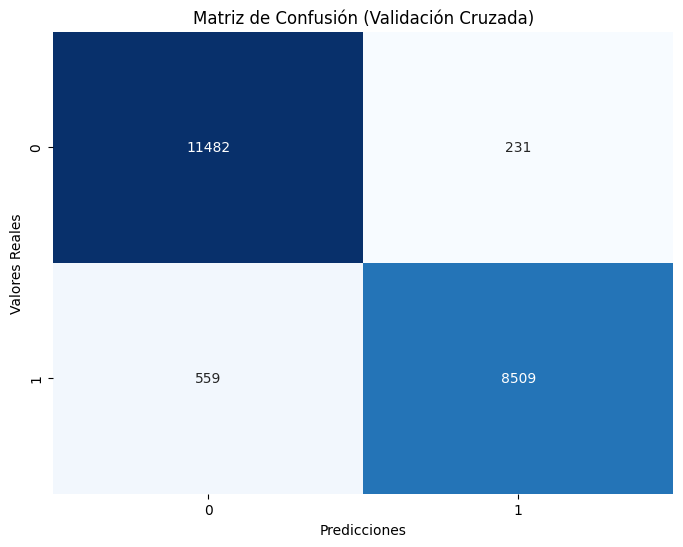

AUC de la validación cruzada: 0.9593164884789958


In [406]:
# Obtener las predicciones de validación cruzada
y_pred = rf_pipeline.predict(X_test)

# Calcula la matriz de confusión global con validación cruzada
cm = confusion_matrix(y_test, y_pred)

# Imprime la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (Validación Cruzada)')
plt.show()

# Calcula el AUC de la validación cruzada
auc_cv = roc_auc_score(y_test, y_pred)
print("AUC de la validación cruzada:", auc_cv)

**Una matriz de confusión típica tiene cuatro elementos principales**

Verdaderos Positivos (True Positives - TP): Estos son los casos en los que el modelo predijo correctamente una instancia como positiva cuando realmente lo era. En otras palabras, son las predicciones correctas de la clase positiva.

Verdaderos Negativos (True Negatives - TN): Estos son los casos en los que el modelo predijo correctamente una instancia como negativa cuando realmente lo era. Son las predicciones correctas de la clase negativa.

Falsos Positivos (False Positives - FP): Estos son los casos en los que el modelo predijo incorrectamente una instancia como positiva cuando en realidad era negativa. También se les llama errores de Tipo I.

Falsos Negativos (False Negatives - FN): Estos son los casos en los que el modelo predijo incorrectamente una instancia como negativa cuando en realidad era positiva. También se les llama errores de Tipo II.

### **6.2. Gradient Boosting**

**Accuracy, Precision, Recall y F1 Score**

In [411]:
# Crear la variable x_train
x_train = preprocessor.fit_transform(X_train)

# Realiza la validación cruzada y obtén las predicciones
y_pred_cv = cross_val_predict(gb_pipeline['gb_model'], x_train, y_train, cv=5)

# Calcula las métricas
accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv)
recall = recall_score(y_train, y_pred_cv)
f1 = f1_score(y_train, y_pred_cv)

print("Métricas con validación cruzada (Train):")
print()
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

c:\Users\FACTORIA F5\.conda\envs\airenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Métricas con validación cruzada (Train):

Accuracy: 0.96
Precision: 0.97
Recall: 0.94
F1 Score: 0.96


In [412]:
# Crear la variable x_test
x_test = preprocessor.fit_transform(X_test)

# Realiza la validación cruzada y obtén las predicciones
y_pred_cv_test = cross_val_predict(gb_pipeline['gb_model'], x_test, y_test, cv=5)

# Calcula las métricas
accuracy = accuracy_score(y_test, y_pred_cv_test)
precision = precision_score(y_test, y_pred_cv_test)
recall = recall_score(y_test, y_pred_cv_test)
f1 = f1_score(y_test, y_pred_cv_test)

print("Métricas con validación cruzada (Test):")
print()
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

c:\Users\FACTORIA F5\.conda\envs\airenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Métricas con validación cruzada (Test):

Accuracy: 0.95
Precision: 0.96
Recall: 0.93
F1 Score: 0.95


**Curva ROC**

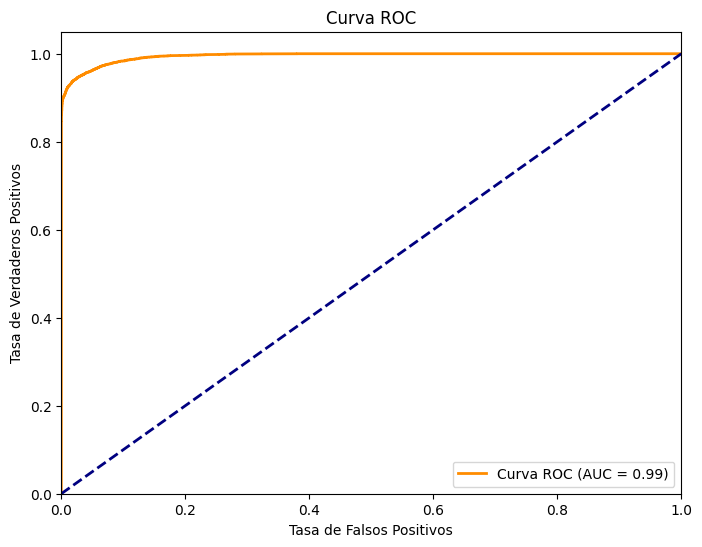

In [413]:
# Obtiene las probabilidades de predicción
y_pred_proba = gb_pipeline.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Matriz de confusion**

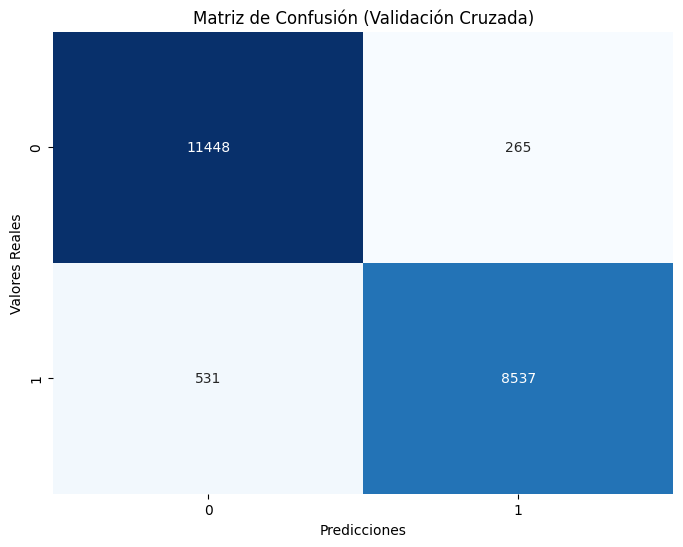

AUC de la validación cruzada: 0.9594090002734493


In [420]:
# Obtener las predicciones de validación cruzada
y_pred = gb_pipeline.predict(X_test)

# Calcula la matriz de confusión global con validación cruzada
cm_gb = confusion_matrix(y_test, y_pred)

# Imprime la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (Validación Cruzada)')
plt.show()

# Calcula el AUC de la validación cruzada
auc_cv = roc_auc_score(y_test, y_pred)
print("AUC de la validación cruzada:", auc_cv)

### **6.3. LightGBM**

**Accuracy, Precision, Recall y F1 Score**

In [417]:
# Crear la variable x_train
x_train = preprocessor.fit_transform(X_train)

# Realiza la validación cruzada y obtén las predicciones
y_pred_cv = cross_val_predict(lgbm_pipeline['lgbm_model'], x_train, y_train, cv=5)

# Calcula las métricas
accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv)
recall = recall_score(y_train, y_pred_cv)
f1 = f1_score(y_train, y_pred_cv)

print("Métricas con validación cruzada:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

c:\Users\FACTORIA F5\.conda\envs\airenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28766, number of negative: 37732
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432584 -> initscore=-0.271314
[LightGBM] [Info] Start training from score -0.271314
[LightGBM] [Info] Number of positive: 28765, number of negative: 37733
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432569 -> initscore=-0.27137

In [418]:
# Crear la variable x_test
x_test = preprocessor.fit_transform(X_test)

# Realiza la validación cruzada y obtén las predicciones
y_pred_cv_test = cross_val_predict(lgbm_pipeline['lgbm_model'], x_test, y_test, cv=5)

# Calcula las métricas
accuracy = accuracy_score(y_test, y_pred_cv_test)
precision = precision_score(y_test, y_pred_cv_test)
recall = recall_score(y_test, y_pred_cv_test)
f1 = f1_score(y_test, y_pred_cv_test)

print("Métricas con validación cruzada (Test):")
print()
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

c:\Users\FACTORIA F5\.conda\envs\airenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7254, number of negative: 9370
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 16624, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436357 -> initscore=-0.255960
[LightGBM] [Info] Start training from score -0.255960
[LightGBM] [Info] Number of positive: 7255, number of negative: 9370
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 16625, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436391 -> initscore=-0.255822
[LightGBM] [Info] Start training from score -0.255822
[LightGBM] [

**Curva ROC**

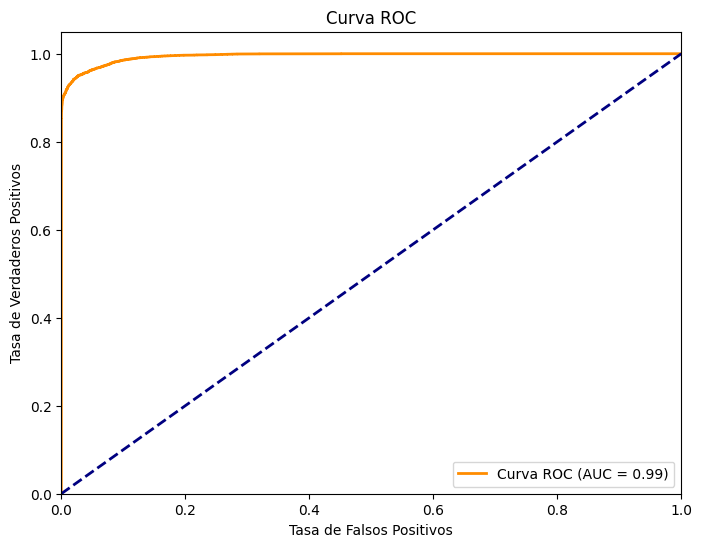

In [419]:
# Obtiene las probabilidades de predicción
y_pred_proba = lgbm_pipeline.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Matriz de confusion**

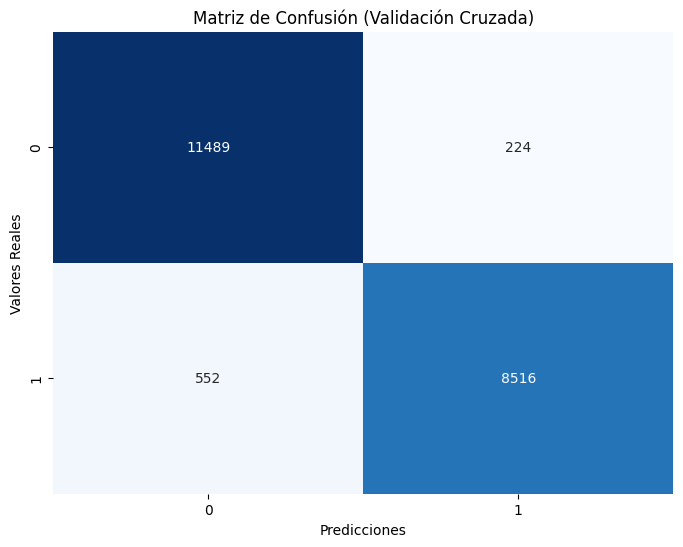

AUC de la validación cruzada: 0.9600012744144614


In [423]:
# Obtener las predicciones de validación cruzada
y_pred = lgbm_pipeline.predict(X_test)

# Calcula la matriz de confusión global con validación cruzada
cm_lgbm = confusion_matrix(y_test, y_pred)

# Imprime la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (Validación Cruzada)')
plt.show()

# Calcula el AUC de la validación cruzada
auc_cv = roc_auc_score(y_test, y_pred)
print("AUC de la validación cruzada:", auc_cv)

### **Conclusiones con validación cruzada**

- Métricas de Random Forest:
  - Accuracy: 0.96
  - Precision: 0.97
  - Recall: 0.94
  - F1 Score: 0.95
  - Curva ROC: 0,99
  - Matriz de Confusión:[[11482   231][559  8509]] 

----------------------------------------------------------------------------------------------------------------------------------------------------------

- Métricas de Gradient Boosting:
  - Accuracy: 0.96
  - Precision: 0.97
  - Recall: 0.94
  - F1 Score: 0.96
  - Curva ROC: 0,99
  - Matriz de Confusión:[[11448   265][531  8537]]

----------------------------------------------------------------------------------------------------------------------------------------------------------

- Métricas de LightGBM:
  - Accuracy: 0.96
  - Precision: 0.97
  - Recall: 0.94
  - F1 Score: 0.96
  - Curva ROC: 0,99
  - Matriz de Confusión:[[11489   224][552  8516]] 

 ---------------------------------------------------------------------------------------------------------------------------------------------------------- 

Los tres modelos dan buenas métricas.

Vamos a aprobar ajustando los hiperparámetros de Gradient Boosting y LightGBM que son los que dan ligeramente mejor, y además tenían menos overfitting en las pruebas iniciales (LightGBM= 0.30%, y Gradient Boosting=1.51%)

## **7. Ajuste de hiperparámetros del modelo**

Ajustamos hiperparámetros en los dos modelos que nosndieron mejor resultado, Gradient Boosting y LightGBM.

Vamos a probar 3 métodos para ver cual nos funciona mejor: RandomizedSearchCV, GridSearchCV y Optuna

7.1. Gradient Boosting

7.2. LightGBM



### **7.1. Gradient Boosting**

**RandomizedSearchCV**

In [64]:
param_grid = {
        'n_estimators': [50, 100, 500, 900, 1100, 1500],
        'random_state': [0,42,50],
        'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
        'min_child_weight': [1, 3,  5, 7, 9],
        'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [ 2, 3, 4, 5, 6, 8, 10, 12, 15]
        }

gs = RandomizedSearchCV(XGBClassifier(), param_grid, scoring="accuracy", n_jobs=-1, verbose=2, n_iter=10)
#gs.fit(X,y)

In [65]:
#gs.best_score_

Mejor resultado optenido: 0.9629754487642546

In [66]:
#gs.best_params_

Mejores parámetros:
  
    parametros:
        {'subsample': 0.6,
        'random_state': 50,
        'n_estimators': 100,
        'min_child_weight': 5,
        'max_depth': 10,
        'learning_rate': 0.1,
        'gamma': 0.1,
        'colsample_bytree': 0.6}

**GridSearchCV**

In [67]:
params = {
    "n_estimators":[50,100,150],
    "random_state":[0,42,50],
    "learning_rate":[0.1,0.3,0.5,1.0],
    "min_child_weight": [1, 3,  5 ],
    "max_depth": [ 2, 3, 4, 5, 10, 12, 15]
    }

In [68]:
grid_search3 = GridSearchCV(XGBClassifier(), params , cv=5, n_jobs=-1)


In [69]:
#grid_search3.fit(X_train,y_train)

In [70]:
#grid_search3.best_score_

Mejor resultado: 0.962116419055338

In [71]:
#best_parameters3 = grid_search3.best_params_
#best_parameters3

Mejores parámetros:

    parametros:
        {'learning_rate': 0.1,
        'n_estimators': 150,
        'random_state': 0}

**Nota:**

Inicialmente probamos GridSearch con tres parámetros y no mejoró el resultado, así que probamos con más parámetros (los que se ven definidos arriba), pero tardó 11h y 14 min en terminar y finalmente se desconectó del entorno así que no pudimos ver los resultado.
Dado que no funciona bien con muchos parámetros y se demora mucho, y con pocos parámetros no da buen resultado, hemos deidido no usar esta técnica en el siguente modelo.

**Optuna**

In [72]:
optuna_study = "ON"
LGBM_study = "OFF"
XGB_study = "OFF"

gpu_switch = "OFF"
skf = StratifiedKFold(n_splits=10)

In [73]:
if gpu_switch == "ON":
    method = "gpu_hist"
else:
    method = "hist"

def objective(trial):
    print("START__________________________________")
    param = {
        'tree_method':method,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'lambda': trial.suggest_float('lambda', 0, 10.0),
        'alpha': trial.suggest_float('alpha', 0, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1,1.0),
        'subsample': trial.suggest_float('subsample', 0.2,1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001,0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100,3000),
        'max_depth': trial.suggest_categorical('max_depth', [2,3,4,5,6,7,8,9,10]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'num_parallel_tree': trial.suggest_int('num_parallel_tree',1,1),
        #'early_stopping_rounds':200,
        }
    results=[]
    n_iterations=[]
    for train_index, test_index in skf.split(X, y):
        train_X, valid_X = X.iloc[train_index], X.iloc[test_index]
        train_y, valid_y = y.iloc[train_index], y.iloc[test_index]
        model = gb_model(**param).fit(train_X,train_y,
                                      eval_set=[(valid_X,valid_y)],
                                      verbose=0
                                     )
        n_iteration = model.get_booster().best_iteration
        n_iterations.append(n_iteration)
        result = accuracy_score(valid_y,(model.predict(valid_X)))
        results.append(result)
        i=int(sum(n_iterations)/len(n_iterations))
    print("Average n_ite=" + str(i))
    print("% of scatter =" + str(np.std(n_iterations)/i))
    n=sum(results)/len(results)
    print (n)
    print("FIIINISH__________________________________\n")
    return n

if optuna_study == XGB_study:
    study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner(),
                                direction='maximize')
    study.optimize(objective, n_trials=100)

**Mejor resultado en la prueba 76**

Resultado: 0.9647078147234286

    Parámetros:
        {'lambda': 7.55879460152309,
        'alpha': 8.2310448018804,
        'colsample_bytree': 0.735830554599987,
        'subsample': 0.9747315745677915,
        'learning_rate': 0.022402712403455725,
        'n_estimators': 1437,
        'max_depth': 10,
        'min_child_weight': 7,
        'num_parallel_tree': 1}

### **7.2. LightGBM**

In [74]:
if gpu_switch == "ON":
    method = "gpu"
else:
    method = "cpu"

def objective(trial):
    param = {
     'objective': 'binary',
     'device': method,
     'metric': 'binary_logloss',
     'verbosity': -1,
     'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
     'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
     'learning_rate': trial.suggest_float('learning_rate', 0.0001,0.1),
     'num_leaves': trial.suggest_int('num_leaves', 2, 512),
     'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
     'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
     'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
     'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
     'n_estimators' : trial.suggest_int('n_estimators', 100, 20000),
     'subsample':None,
     'subsample_freq':None,
     'reg_alpha':None,
     'colsample_bytree':None,
     'reg_lambda':None,
     'early_stopping_round':trial.suggest_int('early_stopping_round', 200, 200)
            }
    results=[]
    n_iterations=[]
    for train_index, test_index in skf.split(X, y):
        train_X, valid_X = X.iloc[train_index], X.iloc[test_index]
        train_y, valid_y = y.iloc[train_index], y.iloc[test_index]
        model = LGBMClassifier(**param).fit(train_X,train_y,
                                            eval_set=[(valid_X,valid_y)]
                                             )
        n_iteration = model.best_iteration_
        n_iterations.append(n_iteration)
        result = accuracy_score(valid_y,(model.predict(valid_X)))
        results.append(result)
        i=int(sum(n_iterations)/len(n_iterations))
    print("Average n_ite=" + str(i))
    print("% of scatter =" + str(np.std(n_iterations)/i))
    n=sum(results)/len(results)
    print(n)
    print("FIIINISH__________________________________\n")

    return n

if optuna_study == LGBM_study:
    study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner(),
                                direction='maximize')
    study.optimize(objective, n_trials=100)
    print('Best trial:', study.best_trial.params)

**Mejor resultado en la prueba 92**

Resultado: 0.9655354975603101


    Parámetros:
        {'lambda_l1': 4.633128525514102,
        'lambda_l2': 0.29043905214501337,
        'learning_rate': 0.005783392827275526,
        'num_leaves': 69,
        'feature_fraction': 0.8359200076066935,
        'bagging_fraction': 0.9119202060331211,
        'bagging_freq': 1,
        'min_child_samples': 8,
        'n_estimators': 10801,
        'early_stopping_round': 200}


## **8. Análisis de las características con más peso en el modelo**

Vamos a analizar la importancia de las variables siguiendo dos métodos diferentes:

8.1. Feature Importances

8.2. Permutation Importance



### **8.1. Feature Importances**

**Feature Importances (gb_model.feature_importances_):**

Estas importancias se basan en la estructura interna del modelo que vamos a entrenar.

Calcula la importancia relativa de las características durante el proceso de entrenamiento y evaluación del modelo.

Es más eficiente computacionalmente, ya que se calcula directamente durante el entrenamiento del modelo.

Puede ser sensible a la calidad de los hiperparámetros y la configuración del modelo.

In [82]:
lgbm_model.fit(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 45025, number of negative: 58879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268267
[LightGBM] [Info] Start training from score -0.268267


LGBMClassifier(random_state=42)

In [83]:
importances = lgbm_model.feature_importances_

In [84]:
# Creamos una ttabla con las variables que más afectan al modelo
importances_table = pd.DataFrame({"feature": list(X.columns), "importance": lgbm_model.feature_importances_}).sort_values("importance", ascending=False)

importances_table

,feature,importance
2,Inflight wifi service,511
0,Age,213
19,Customer Type_disloyal Customer,189
20,Type of Travel_Personal Travel,180
12,Baggage handling,180
7,Online boarding,169
1,Flight Distance,160
14,Inflight service,152
5,Gate location,151
8,Seat comfort,150


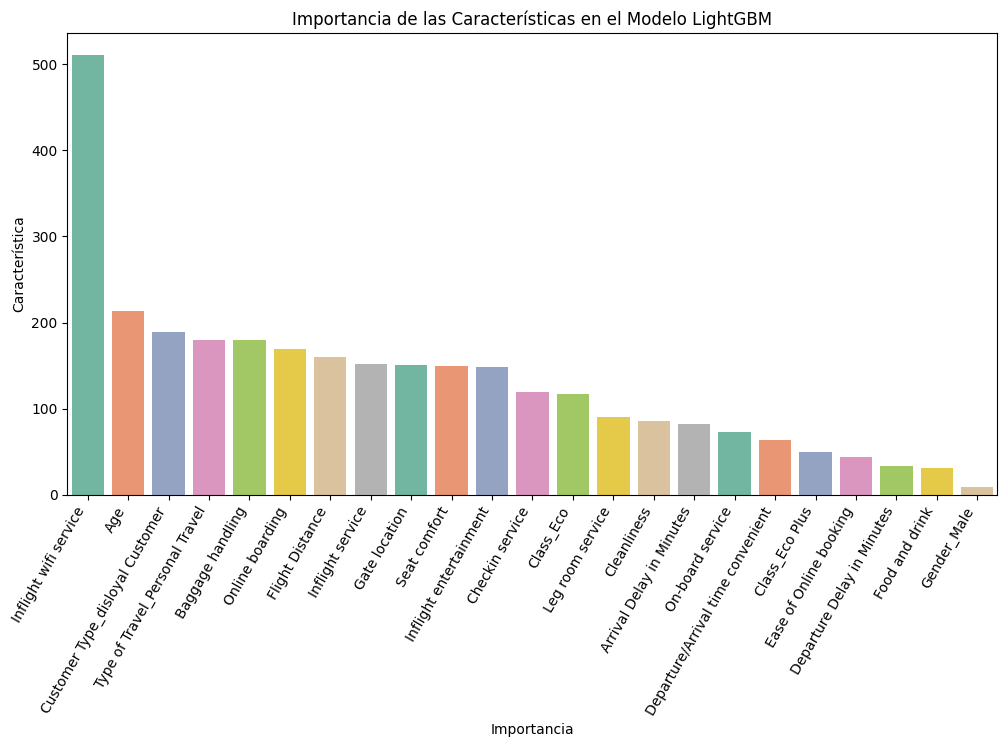

In [85]:
# Ordena la tabla de importancias por valor de importancia en orden descendente
importances_table = importances_table.sort_values(by='importance', ascending=False)

# Crea el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='importance', data=importances_table, palette='Set2')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características en el Modelo LightGBM')
plt.xticks(rotation=60, ha='right')
plt.show()

**Observaciones**

La variable con más peso para este modelo es 'Inflight wifi service', con mucha diferencia respecto a las demás.

Las siguientes más importantes son 'Age', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel' y 'Baggage handling	'.



### **8.2. Permutation Importance**

In [86]:
params_LGBM_best= {'lambda_l1': 1.255571695351096,
                  'lambda_l2': 1.4404178282081725,
                  'learning_rate': 0.019332749641584428,
                  'num_leaves': 89,
                  'feature_fraction': 0.9237476130356966,
                  'bagging_fraction': 0.8418107873091321,
                  'bagging_freq': 6,
                  'min_child_samples': 55,
                  'n_estimators': 5220,
                  'early_stopping_round': 200}

In [87]:
# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

# Crear y entrenar el modelo LightGBM con un conjunto de validación
model = LGBMClassifier(**params_LGBM_best, n_jobs=-1)
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

# Calcular la importancia de las variables usando Permutation Importance
perm = PermutationImportance(model, random_state=1, n_iter=10, cv='prefit').fit(X_valid, y_valid)

# Mostrar la importancia de las variables
eli5.show_weights(perm, feature_names=X.columns.tolist(), top=50)

[LightGBM] [Warning] feature_fraction is set=0.9237476130356966, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237476130356966
[LightGBM] [Warning] lambda_l2 is set=1.4404178282081725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4404178282081725
[LightGBM] [Warning] lambda_l1 is set=1.255571695351096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.255571695351096
[LightGBM] [Warning] bagging_fraction is set=0.8418107873091321, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8418107873091321
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9237476130356966, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237476130356966
[LightGBM] [Warning] lambda_l2 is set=1.4404178282081725, reg_lambda=0.0 will be ignored. Cu

Weight,Feature
0.1757 ± 0.0022,Type of Travel_Personal Travel
0.1400 ± 0.0033,Inflight wifi service
0.0776 ± 0.0034,Customer Type_disloyal Customer
0.0350 ± 0.0019,Baggage handling
0.0349 ± 0.0021,Online boarding
0.0328 ± 0.0026,Inflight service
0.0299 ± 0.0024,Seat comfort
0.0296 ± 0.0016,Checkin service
0.0221 ± 0.0012,Cleanliness
0.0074 ± 0.0009,On-board service


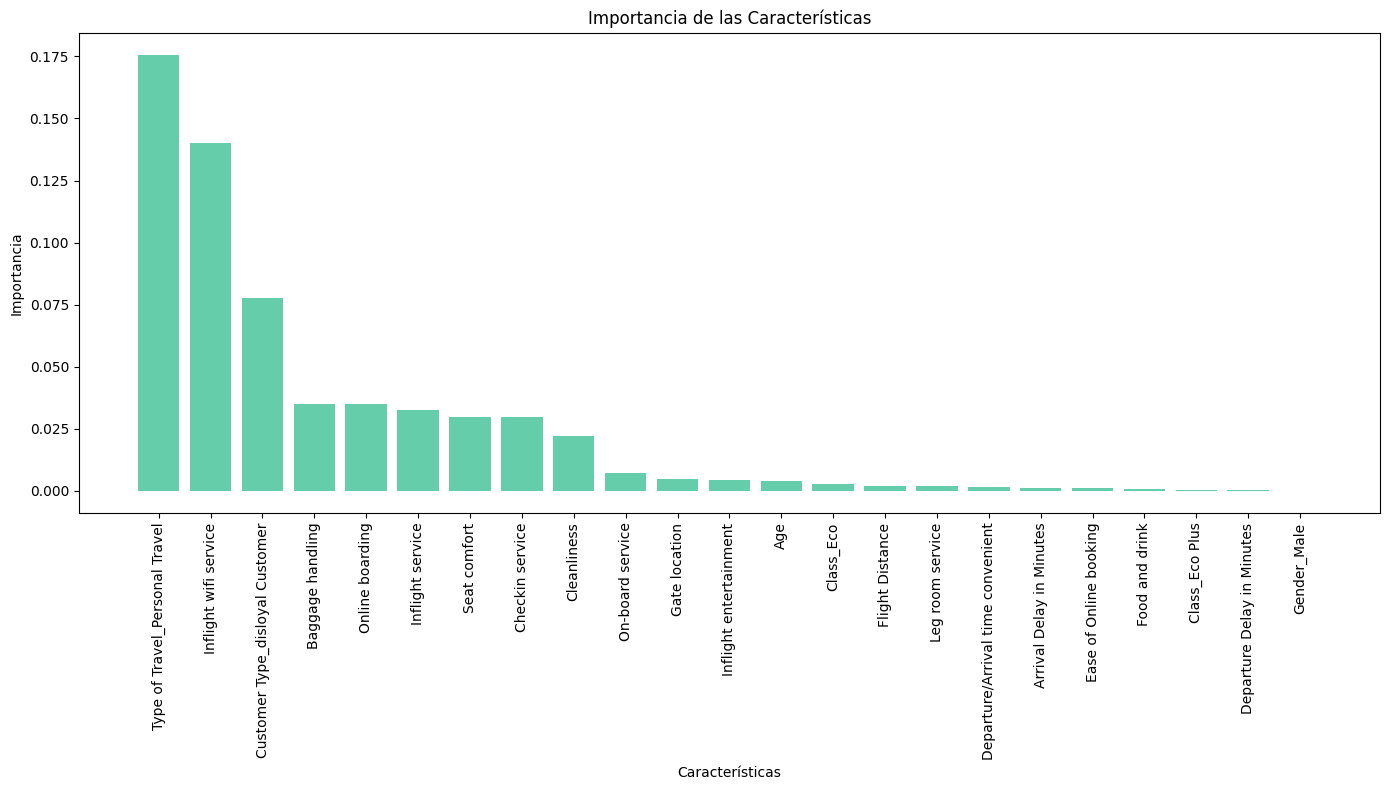

In [88]:
# Obtén los pesos e nombres de características
weights = perm.feature_importances_
feature_names = X.columns.tolist()

# Ordena las características por importancia
sorted_idx = weights.argsort()[::-1]

# Configura el tamaño de la figura
plt.figure(figsize=(14, 8))

# Crea la gráfica de barras
plt.bar(range(len(weights)), weights[sorted_idx], align="center", color='mediumaquamarine')
plt.xticks(range(len(weights)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características")

# Muestra la gráfica
plt.tight_layout()
plt.show()

**Permutation Importance**

Permutation Importance es una técnica de evaluación posterior al entrenamiento.

Funciona permutando aleatoriamente los valores de una característica en el conjunto de datos, y luego evaluando cómo esto afecta a las métricas del rendimiento del modelo (como la precisión o el error).

Cuanto más se degrade el rendimiento del modelo cuando se permuta una característica específica, más importante se considera esa característica para el modelo. La importancia se calcula midiendo la diferencia en la métrica de evaluación (como precisión o error) antes y después de la permutación. Cuanto mayor sea la diferencia, más importante se considera la característica.

Es una medida más agnóstica del modelo y evalúa la importancia de las características desde una perspectiva más global y empírica.

Puede ser más robusta en ciertos casos, especialmente cuando el modelo tiene interacciones complejas entre características y datos ruidosos.

Es computacionalmente más costosa, ya que requiere ajustar el modelo muchas veces.

**Observaciones**



La variable con más peso según el método 'Permutation Importance' es 'Type of Travel_PersonalTravel'.

A continuación le sigue de cerca 'Inflight wifi service', y después 'Customer Type_disloyal Customer' y 'Online boarding'


**Conclusiones**

Las 4 variables con más peso coinciden en ambos métodos:

- Type of Travel_PersonalTravel

- Inflight wifi service

- Customer Type_disloyal Customer

- Baggage handling


La gran diferencia entre ambos es que Feature Importance coloca como claro ganador a 'Inflight wifi service', mientras que Permutation importance coloca esta variable en segundo lugar.

Por algún motivo, esta variable parece tener mucho peso en el modelo elegido.

En cuanto a cuál es más "fiable", depende del contexto y los objetivos del análisis:

- Si te interesa conocer cómo el modelo ha aprendido a partir de los datos y cuáles son las características más importantes según su estructura interna, entonces gb_model.feature_importances_ puede ser más relevante y confiable.

- Si deseas una evaluación más empírica e independiente del modelo, o si sospechas que el modelo puede haber sobreajustado ciertas características, Permutation Importance puede proporcionar una perspectiva diferente y, en algunos casos, más informativa.

## **9. Conclusiones**


**Modelo**

* Modelo elegido: LGBMClassifier

* Métricas:
  - Accuracy: 0.96
  - Precision: 0.97
  - Recall: 0.94
  - F1 Score: 0.96
  - Curva ROC: 0,99
  - Matriz de Confusión:[[46271   895][2161  33796]]

* Mejor resultado ('binary_logloss'): 0.9655354975603101

* Mejores parámetros:
    
    
    Parámetros: {'lambda_l1': 4.633128525514102,
                'lambda_l2': 0.29043905214501337,
                'learning_rate': 0.005783392827275526,
                'num_leaves': 69,
                'feature_fraction': 0.8359200076066935,
                'bagging_fraction': 0.9119202060331211,
                'bagging_freq': 1,
                'min_child_samples': 8,
                'n_estimators': 10801,
                'early_stopping_round': 200}



**Variables**

* Variables con más peso en el modelo:
  - Inflight wifi service:	511
  - Age:	213
  - Customer Type_disloyal Customer:	189
  - Type of Travel_Personal Travel:	180
  - Baggage handling:	180


* Variables con más peso de forma general:
  - Type of Travel_Personal Travel: 0.1757 ± 0.0022
  - Inflight wifi service: 0.1400 ± 0.0033
  - Customer Type_disloyal Customer: 0.0776 ± 0.0034
  - Baggage handling: 0.0350 ± 0.0019
  - Online boarding: 0.0349 ± 0.0021